# Fuel Efficiency Prediction using Machine Learning

Importing NumPy and Pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/fuel.csv',low_memory=False)
# df

Correlation Heatmap of unprocessed data

<Axes: >

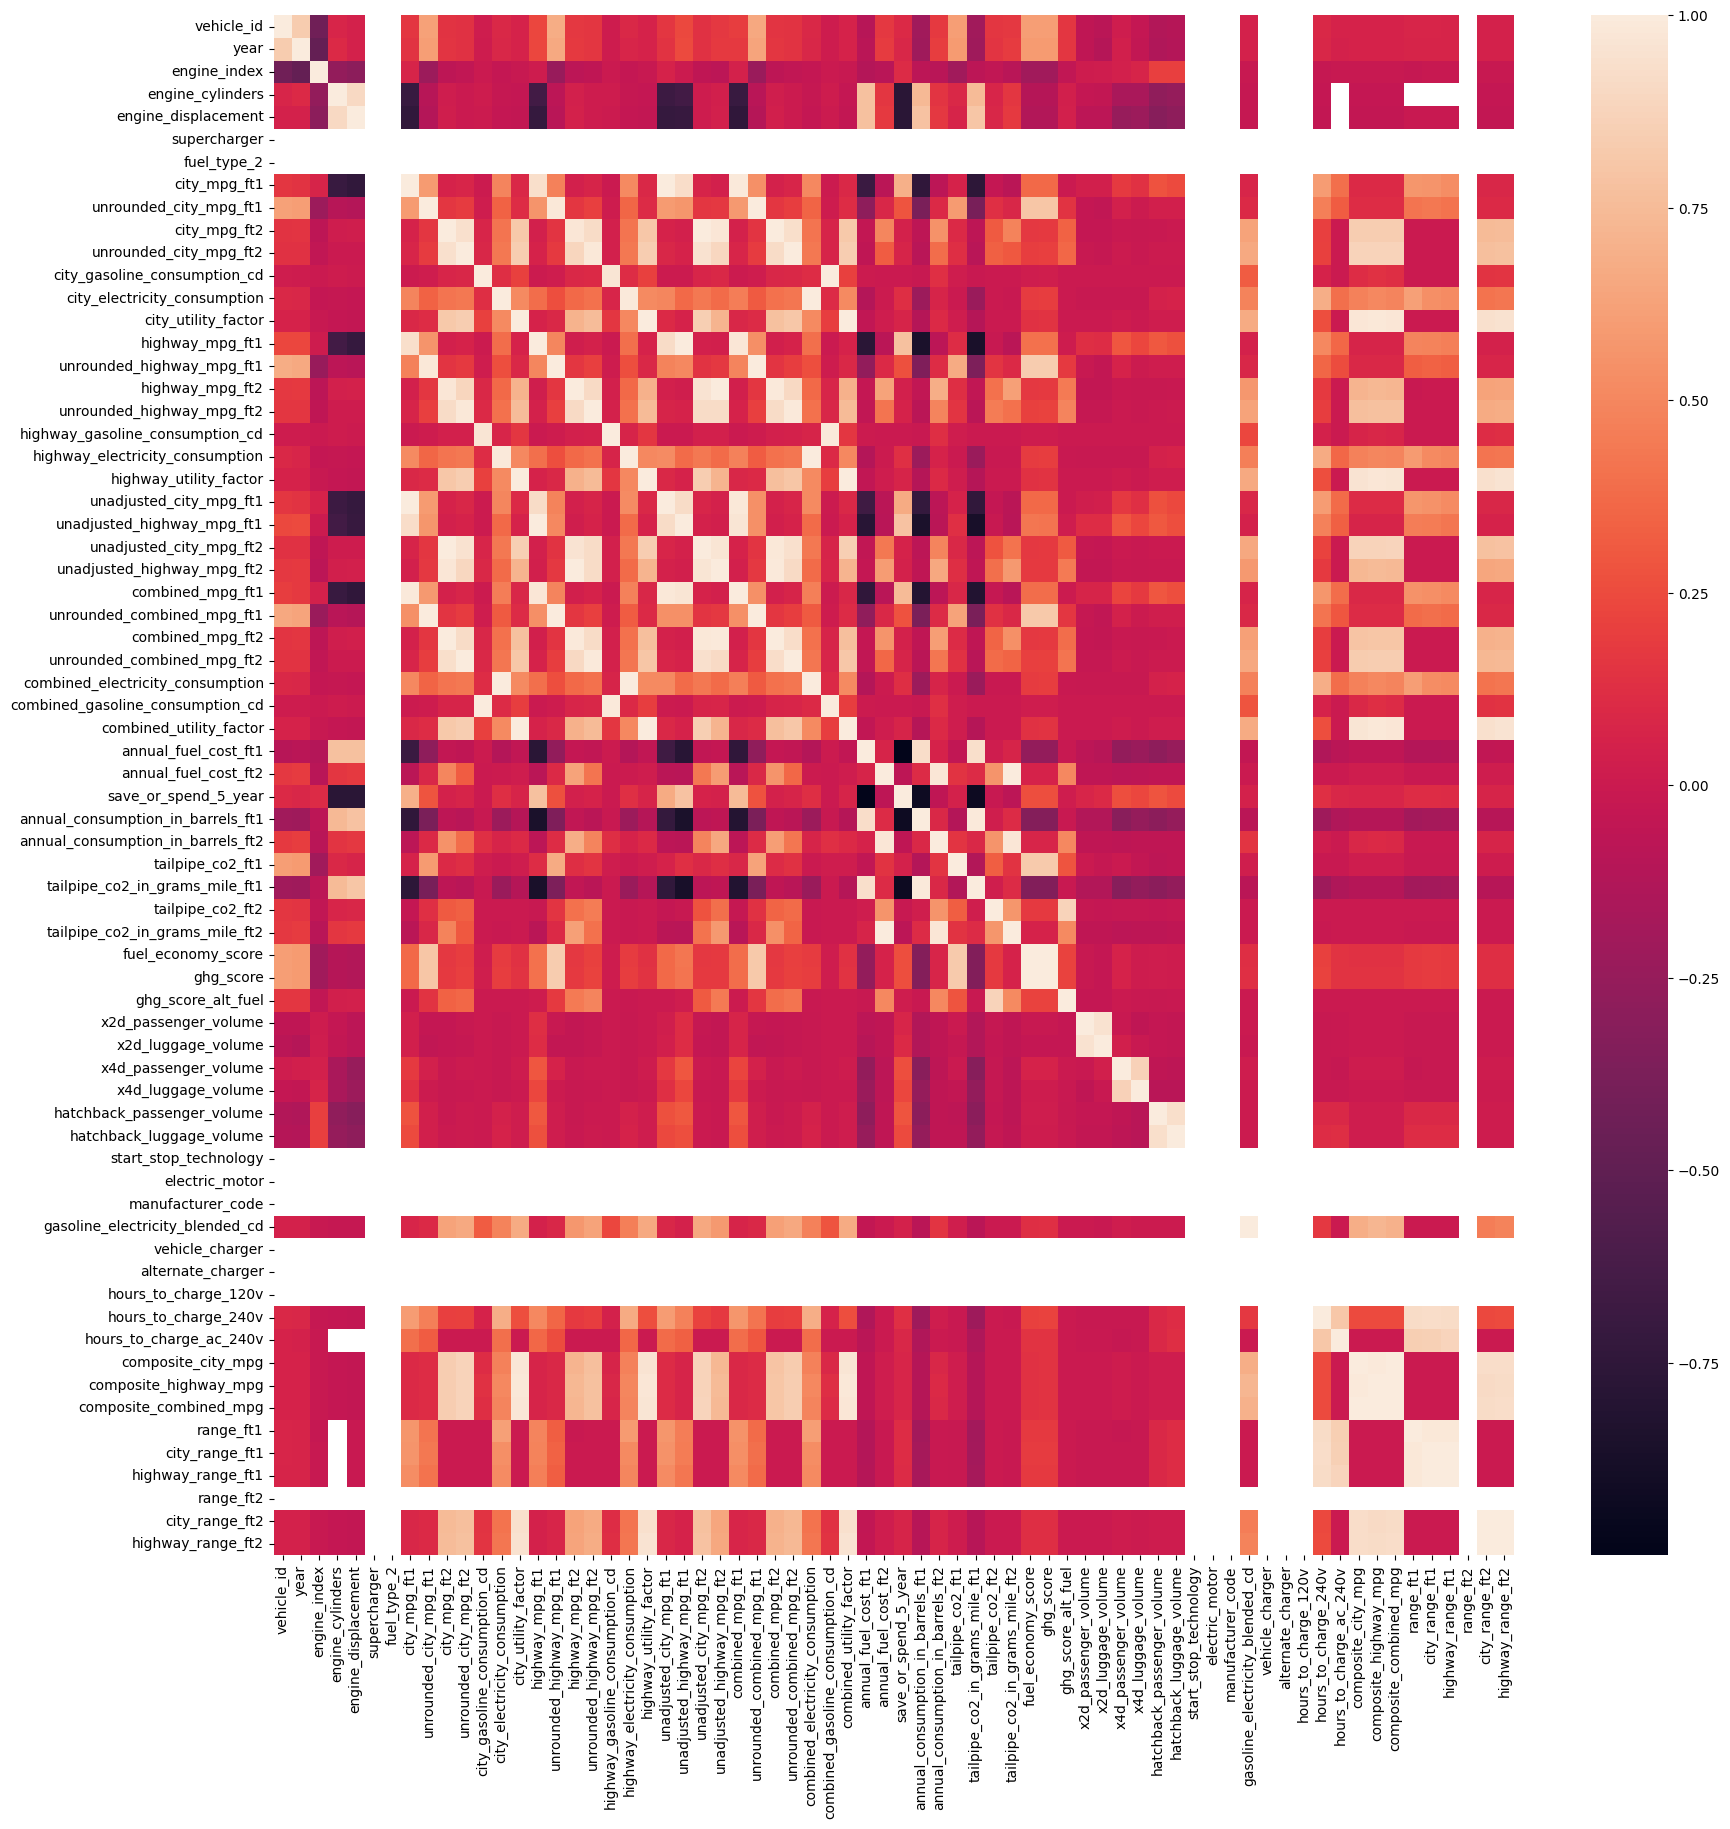

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True))


Printing head and tail of dataset

In [ ]:
df.head()

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [ ]:
df.tail()

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,...,0.0,29,32,30,0,0.0,0.0,NaN,13.84,13.3
38112,37687,2017,Volvo,XC90 FWD,Standard Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,50,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0


Printing datatypes of columns in a dictionary format

In [ ]:
dict(df.dtypes)

{'vehicle_id': dtype('int64'),
 'year': dtype('int64'),
 'make': dtype('O'),
 'model': dtype('O'),
 'class': dtype('O'),
 'drive': dtype('O'),
 'transmission': dtype('O'),
 'transmission_type': dtype('O'),
 'engine_index': dtype('int64'),
 'engine_descriptor': dtype('O'),
 'engine_cylinders': dtype('float64'),
 'engine_displacement': dtype('float64'),
 'turbocharger': dtype('O'),
 'supercharger': dtype('float64'),
 'fuel_type': dtype('O'),
 'fuel_type_1': dtype('O'),
 'fuel_type_2': dtype('float64'),
 'city_mpg_ft1': dtype('int64'),
 'unrounded_city_mpg_ft1': dtype('float64'),
 'city_mpg_ft2': dtype('int64'),
 'unrounded_city_mpg_ft2': dtype('float64'),
 'city_gasoline_consumption_cd': dtype('float64'),
 'city_electricity_consumption': dtype('float64'),
 'city_utility_factor': dtype('float64'),
 'highway_mpg_ft1': dtype('int64'),
 'unrounded_highway_mpg_ft1': dtype('float64'),
 'highway_mpg_ft2': dtype('int64'),
 'unrounded_highway_mpg_ft2': dtype('float64'),
 'highway_gasoline_consump

Missing value heatmap of unprocessed data

<Axes: >

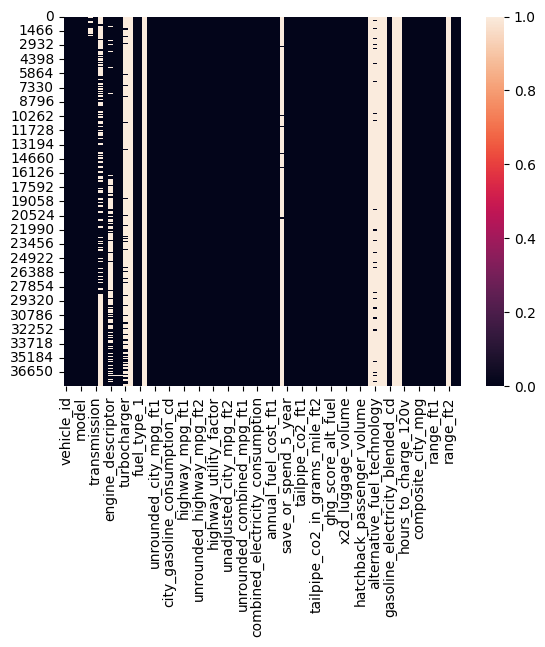

In [ ]:
sns.heatmap(df.isna())

Renaming the output column 'combined_mpg_ft1' to 'miles_per_gallon'

In [ ]:
df.rename(columns={'combined_mpg_ft1':'miles_per_gallon'},inplace=True)

Creating an empty dictionary and appending the columns the missing value data

In [ ]:
dic=dict()
for i in df.columns:
  dic[i]=df[i].isna().sum()
dic

{'vehicle_id': 0,
 'year': 0,
 'make': 0,
 'model': 0,
 'class': 0,
 'drive': 1189,
 'transmission': 11,
 'transmission_type': 23068,
 'engine_index': 0,
 'engine_descriptor': 15420,
 'engine_cylinders': 136,
 'engine_displacement': 134,
 'turbocharger': 32874,
 'supercharger': 38113,
 'fuel_type': 0,
 'fuel_type_1': 0,
 'fuel_type_2': 38113,
 'city_mpg_ft1': 0,
 'unrounded_city_mpg_ft1': 0,
 'city_mpg_ft2': 0,
 'unrounded_city_mpg_ft2': 0,
 'city_gasoline_consumption_cd': 0,
 'city_electricity_consumption': 0,
 'city_utility_factor': 0,
 'highway_mpg_ft1': 0,
 'unrounded_highway_mpg_ft1': 0,
 'highway_mpg_ft2': 0,
 'unrounded_highway_mpg_ft2': 0,
 'highway_gasoline_consumption_cd': 0,
 'highway_electricity_consumption': 0,
 'highway_utility_factor': 0,
 'unadjusted_city_mpg_ft1': 0,
 'unadjusted_highway_mpg_ft1': 0,
 'unadjusted_city_mpg_ft2': 0,
 'unadjusted_highway_mpg_ft2': 0,
 'miles_per_gallon': 0,
 'unrounded_combined_mpg_ft1': 0,
 'combined_mpg_ft2': 0,
 'unrounded_combined_mpg

Creating a empty dictionary named 'missing' and appending data of columns having missing values

In [ ]:
missing=dict()
for i in dic:
  if dic[i]>0:
    missing[i]=dic[i]
missing

{'drive': 1189,
 'transmission': 11,
 'transmission_type': 23068,
 'engine_descriptor': 15420,
 'engine_cylinders': 136,
 'engine_displacement': 134,
 'turbocharger': 32874,
 'supercharger': 38113,
 'fuel_type_2': 38113,
 'gas_guzzler_tax': 37149,
 'start_stop_technology': 38113,
 'alternative_fuel_technology': 35066,
 'electric_motor': 38113,
 'manufacturer_code': 38113,
 'vehicle_charger': 38113,
 'alternate_charger': 38113,
 'range_ft2': 38113}

Printing missing value percentage of each columns

In [ ]:
missing_p=dict()
for i in df.columns:
    missing_p[i]=df[i].isnull().mean()*100
missing_p

{'vehicle_id': 0.0,
 'year': 0.0,
 'make': 0.0,
 'model': 0.0,
 'class': 0.0,
 'drive': 3.1196704536509854,
 'transmission': 0.02886154330543384,
 'transmission_type': 60.525280088158894,
 'engine_index': 0.0,
 'engine_descriptor': 40.45863616088998,
 'engine_cylinders': 0.3568336263217275,
 'engine_displacement': 0.3515860729934668,
 'turbocharger': 86.2540340566211,
 'supercharger': 100.0,
 'fuel_type': 0.0,
 'fuel_type_1': 0.0,
 'fuel_type_2': 100.0,
 'city_mpg_ft1': 0.0,
 'unrounded_city_mpg_ft1': 0.0,
 'city_mpg_ft2': 0.0,
 'unrounded_city_mpg_ft2': 0.0,
 'city_gasoline_consumption_cd': 0.0,
 'city_electricity_consumption': 0.0,
 'city_utility_factor': 0.0,
 'highway_mpg_ft1': 0.0,
 'unrounded_highway_mpg_ft1': 0.0,
 'highway_mpg_ft2': 0.0,
 'unrounded_highway_mpg_ft2': 0.0,
 'highway_gasoline_consumption_cd': 0.0,
 'highway_electricity_consumption': 0.0,
 'highway_utility_factor': 0.0,
 'unadjusted_city_mpg_ft1': 0.0,
 'unadjusted_highway_mpg_ft1': 0.0,
 'unadjusted_city_mpg_ft2'

- Columns containing above 50% of missing values are considered as Irrelevant column
- Such columns are filtered and appended to a list named 'unwanted_columns'
- Defining the missing limit in a variable called 'missing_limit'

In [ ]:
unwanted_columns=[]
final_missing=dict()
missing_limit=df.shape[0]*0.50

for i in missing:
  if missing[i]<missing_limit:
    final_missing[i]=missing[i]
  else:
    unwanted_columns.append(i)

final_missing

{'drive': 1189,
 'transmission': 11,
 'engine_descriptor': 15420,
 'engine_cylinders': 136,
 'engine_displacement': 134}

Printing unwanted_columns

In [ ]:
unwanted_columns

['transmission_type',
 'turbocharger',
 'supercharger',
 'fuel_type_2',
 'gas_guzzler_tax',
 'start_stop_technology',
 'alternative_fuel_technology',
 'electric_motor',
 'manufacturer_code',
 'vehicle_charger',
 'alternate_charger',
 'range_ft2']

- Since, 'fuel_type_2' is an unwanted column because it has too much missing values,
- All other columns that are based on 'ft2' or 'fuel_type_2' is also considered Irrelavant

In [ ]:
ft2_unwanted=[]
for i in df.columns:
  if 'ft2' in i:
    ft2_unwanted.append(i)

ft2_unwanted

['city_mpg_ft2',
 'unrounded_city_mpg_ft2',
 'highway_mpg_ft2',
 'unrounded_highway_mpg_ft2',
 'unadjusted_city_mpg_ft2',
 'unadjusted_highway_mpg_ft2',
 'combined_mpg_ft2',
 'unrounded_combined_mpg_ft2',
 'annual_fuel_cost_ft2',
 'annual_consumption_in_barrels_ft2',
 'tailpipe_co2_ft2',
 'tailpipe_co2_in_grams_mile_ft2',
 'range_ft2',
 'city_range_ft2',
 'highway_range_ft2']

Finding which column is common among both unwanted_columns and ft2_unwanted

In [ ]:
common_unwanted=list(set(unwanted_columns) & set(ft2_unwanted) )
common_unwanted

['range_ft2']

- Creating a list of final_unwanted columns by combining both unwanted_columns and ft2_unwanted columns using set union method
- Using set union method, the common values doesn't get repeated in final list

In [ ]:
final_unwanted=list(set(unwanted_columns) | set(ft2_unwanted))
final_unwanted

['highway_range_ft2',
 'turbocharger',
 'unadjusted_highway_mpg_ft2',
 'city_mpg_ft2',
 'alternative_fuel_technology',
 'manufacturer_code',
 'highway_mpg_ft2',
 'tailpipe_co2_in_grams_mile_ft2',
 'supercharger',
 'unadjusted_city_mpg_ft2',
 'unrounded_city_mpg_ft2',
 'combined_mpg_ft2',
 'city_range_ft2',
 'vehicle_charger',
 'transmission_type',
 'unrounded_combined_mpg_ft2',
 'fuel_type_2',
 'annual_fuel_cost_ft2',
 'range_ft2',
 'annual_consumption_in_barrels_ft2',
 'tailpipe_co2_ft2',
 'unrounded_highway_mpg_ft2',
 'start_stop_technology',
 'gas_guzzler_tax',
 'alternate_charger',
 'electric_motor']

- Creating a temporary 'temp' variable and assigning the dataframe with dropped columns
- Printing the column named after the unwanted columns are dropped

In [ ]:
temp=df.drop(final_unwanted,axis=1)
ind=list(temp.columns)
ind

['vehicle_id',
 'year',
 'make',
 'model',
 'class',
 'drive',
 'transmission',
 'engine_index',
 'engine_descriptor',
 'engine_cylinders',
 'engine_displacement',
 'fuel_type',
 'fuel_type_1',
 'city_mpg_ft1',
 'unrounded_city_mpg_ft1',
 'city_gasoline_consumption_cd',
 'city_electricity_consumption',
 'city_utility_factor',
 'highway_mpg_ft1',
 'unrounded_highway_mpg_ft1',
 'highway_gasoline_consumption_cd',
 'highway_electricity_consumption',
 'highway_utility_factor',
 'unadjusted_city_mpg_ft1',
 'unadjusted_highway_mpg_ft1',
 'miles_per_gallon',
 'unrounded_combined_mpg_ft1',
 'combined_electricity_consumption',
 'combined_gasoline_consumption_cd',
 'combined_utility_factor',
 'annual_fuel_cost_ft1',
 'save_or_spend_5_year',
 'annual_consumption_in_barrels_ft1',
 'tailpipe_co2_ft1',
 'tailpipe_co2_in_grams_mile_ft1',
 'fuel_economy_score',
 'ghg_score',
 'ghg_score_alt_fuel',
 'my_mpg_data',
 'x2d_passenger_volume',
 'x2d_luggage_volume',
 'x4d_passenger_volume',
 'x4d_luggage_vol

Identifying which all are the columns that are of 'object' datatype

In [ ]:
object_columns=[i for i in df.select_dtypes(include='object')]
object_columns

['make',
 'model',
 'class',
 'drive',
 'transmission',
 'transmission_type',
 'engine_descriptor',
 'turbocharger',
 'fuel_type',
 'fuel_type_1',
 'gas_guzzler_tax',
 'my_mpg_data',
 'alternative_fuel_technology']

Printing unique values of each and every column

In [ ]:
for i in temp.columns:
  print(i)
  print('-'*100)
  print(temp[i].unique())
  print('='*100)

vehicle_id
----------------------------------------------------------------------------------------------------
[26587 27705 26561 ... 37548 37703 37687]
year
----------------------------------------------------------------------------------------------------
[1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]
make
----------------------------------------------------------------------------------------------------
['Alfa Romeo' 'AM General' 'American Motors Corporation' 'Aston Martin'
 'Audi' 'Avanti Motor Corporation' 'Bertone'
 'Bill Dovell Motor Car Company' 'Bitter Gmbh and Co. Kg' 'BMW' 'Buick'
 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'Ford' 'GMC' 'Grumman Olson'
 'Honda' 'Import Foreign Auto Sales Inc' 'Isuzu' 'Jaguar' 'Jeep'
 'Kenyon Corporation Of America' 'Lamborghini' 'Lincoln' 'Lotus'
 'Maserati' 'Mazda' 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan'
 

Since unrounded and unadjusted are having same but decimal values of corresponding columns, such columns are not necessary
- 'range' columns are considered irrelevant since it doesn't have impact on Fuel Economy
- 'volume' columns are also considered irrelevant since it doesn't have much impact on Fuel Economy

-  Collecting the column names of such columns and appending to a list named 'unrounded'

In [ ]:
unrounded=[]
for i in temp.columns:
  if 'unrounded' in i or 'unadjusted' in i:
    unrounded.append(i)
  if 'range' in i :
    unrounded.append(i)
  if 'volume' in i or 'combined' in i or 'composite' in i:
    unrounded.append(i)

unrounded

['unrounded_city_mpg_ft1',
 'unrounded_highway_mpg_ft1',
 'unadjusted_city_mpg_ft1',
 'unadjusted_highway_mpg_ft1',
 'unrounded_combined_mpg_ft1',
 'unrounded_combined_mpg_ft1',
 'combined_electricity_consumption',
 'combined_gasoline_consumption_cd',
 'combined_utility_factor',
 'x2d_passenger_volume',
 'x2d_luggage_volume',
 'x4d_passenger_volume',
 'x4d_luggage_volume',
 'hatchback_passenger_volume',
 'hatchback_luggage_volume',
 'composite_city_mpg',
 'composite_highway_mpg',
 'composite_combined_mpg',
 'range_ft1',
 'city_range_ft1',
 'highway_range_ft1']

Dropping the Irrelevant columns using the list named 'unrounded'

In [ ]:
temp.drop(unrounded,axis=1,inplace=True)
list(temp.columns)

['vehicle_id',
 'year',
 'make',
 'model',
 'class',
 'drive',
 'transmission',
 'engine_index',
 'engine_descriptor',
 'engine_cylinders',
 'engine_displacement',
 'fuel_type',
 'fuel_type_1',
 'city_mpg_ft1',
 'city_gasoline_consumption_cd',
 'city_electricity_consumption',
 'city_utility_factor',
 'highway_mpg_ft1',
 'highway_gasoline_consumption_cd',
 'highway_electricity_consumption',
 'highway_utility_factor',
 'miles_per_gallon',
 'annual_fuel_cost_ft1',
 'save_or_spend_5_year',
 'annual_consumption_in_barrels_ft1',
 'tailpipe_co2_ft1',
 'tailpipe_co2_in_grams_mile_ft1',
 'fuel_economy_score',
 'ghg_score',
 'ghg_score_alt_fuel',
 'my_mpg_data',
 'gasoline_electricity_blended_cd',
 'hours_to_charge_120v',
 'hours_to_charge_240v',
 'hours_to_charge_ac_240v']

Furthermore, columns such as Vehicle id, year, make, model doesn't have impact on calculating Fuel Economy
- Columns that are not related with Fuel Economy are collected
- Electric vehicles are not related with miles per gallon so, we're dropping the Rows containing data that has 'Electricity' as fuel type and Such related columns

In [ ]:
un=['vehicle_id',
 'year',
 'make',
 'model',
 'my_mpg_data',
 'fuel_type',
  'engine_index',
    'engine_descriptor',
    'gasoline_electricity_blended_cd']

In [ ]:
temp.loc[temp['fuel_type_1']=='Electricity']

,vehicle_id,year,make,model,class,drive,transmission,engine_index,engine_descriptor,engine_cylinders,...,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,fuel_economy_score,ghg_score,ghg_score_alt_fuel,my_mpg_data,gasoline_electricity_blended_cd,hours_to_charge_120v,hours_to_charge_240v,hours_to_charge_ac_240v
16448,30976,1998,Chevrolet,S10 Electric,Small Pickup Trucks 2WD,2-Wheel Drive,Automatic (A1),0,Lead Acid,NaN,...,0,0.0,-1,-1,-1,N,False,0,0.0,0.00
16449,30977,1998,Chevrolet,S10 Electric,Small Pickup Trucks 2WD,2-Wheel Drive,Automatic (A1),0,NiMH,NaN,...,0,0.0,-1,-1,-1,N,False,0,0.0,0.00
16711,30975,1998,Honda,EV Plus,Compact Cars,NaN,Automatic (A1),0,NaN,NaN,...,0,0.0,-1,-1,-1,N,False,0,0.0,0.00
17323,30973,1999,Dodge,Caravan/Grand Caravan 2WD,Minivan - 2WD,2-Wheel Drive,Automatic (A1),0,NaN,NaN,...,0,0.0,-1,-1,-1,N,False,0,0.0,0.00
17433,30971,1999,Ford,Ranger Pickup 2WD,Standard Pickup Trucks 2WD,2-Wheel Drive,Automatic (A1),0,Lead Acid,NaN,...,0,0.0,-1,-1,-1,N,False,0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37998,38526,2017,Tesla,Model X AWD - 60D,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (A1),12,NaN,NaN,...,0,0.0,10,10,-1,N,False,0,12.0,4.75
37999,38527,2017,Tesla,Model X AWD - 75D,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (A1),11,NaN,NaN,...,0,0.0,10,10,-1,N,False,0,12.0,4.75
38000,38528,2017,Tesla,Model X AWD - 90D,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (A1),9,NaN,NaN,...,0,0.0,10,10,-1,N,False,0,12.0,4.75
38001,38530,2017,Tesla,Model X AWD - P100D,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (A1),13,NaN,NaN,...,0,0.0,10,10,-1,N,False,0,12.0,4.75


Dropping the unwanted columns using the list 'un'

In [ ]:
temp.drop(un,axis=1,inplace=True)
list(temp.columns)

['class',
 'drive',
 'transmission',
 'engine_cylinders',
 'engine_displacement',
 'fuel_type_1',
 'city_mpg_ft1',
 'city_gasoline_consumption_cd',
 'city_electricity_consumption',
 'city_utility_factor',
 'highway_mpg_ft1',
 'highway_gasoline_consumption_cd',
 'highway_electricity_consumption',
 'highway_utility_factor',
 'miles_per_gallon',
 'annual_fuel_cost_ft1',
 'save_or_spend_5_year',
 'annual_consumption_in_barrels_ft1',
 'tailpipe_co2_ft1',
 'tailpipe_co2_in_grams_mile_ft1',
 'fuel_economy_score',
 'ghg_score',
 'ghg_score_alt_fuel',
 'hours_to_charge_120v',
 'hours_to_charge_240v',
 'hours_to_charge_ac_240v']

- Printing the column count of dataframe after dropping all the unwanted columns
- Column count dropped from 81 to 27

In [ ]:
temp.shape[1]

26

Finding the count of missing values in dataframe

In [ ]:
temp.isna().sum()

,0
class,0
drive,1189
transmission,11
engine_cylinders,136
engine_displacement,134
fuel_type_1,0
city_mpg_ft1,0
city_gasoline_consumption_cd,0
city_electricity_consumption,0
city_utility_factor,0


Using knn-imputer to fill the missing values of columns having numeric datatype

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()

for i in temp.select_dtypes(include='number'):
  if temp[i].isna().sum() > 0:
    temp[i]=imputer.fit_transform(temp[[i]])
temp.isna().sum()

,0
class,0
drive,1189
transmission,11
engine_cylinders,0
engine_displacement,0
fuel_type_1,0
city_mpg_ft1,0
city_gasoline_consumption_cd,0
city_electricity_consumption,0
city_utility_factor,0


Using SimpleImputer for filling missing values of columns having object datatype

In [ ]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='most_frequent')

for i in temp.select_dtypes(include='object'):
  if temp[i].isna().sum() > 0:
    temp[[i]]=imputer.fit_transform(temp[[i]])
temp.isna().sum()

,0
class,0
drive,0
transmission,0
engine_cylinders,0
engine_displacement,0
fuel_type_1,0
city_mpg_ft1,0
city_gasoline_consumption_cd,0
city_electricity_consumption,0
city_utility_factor,0


Plotting correlation heatmap of dataframe after dropping unwanted columns

<Axes: >

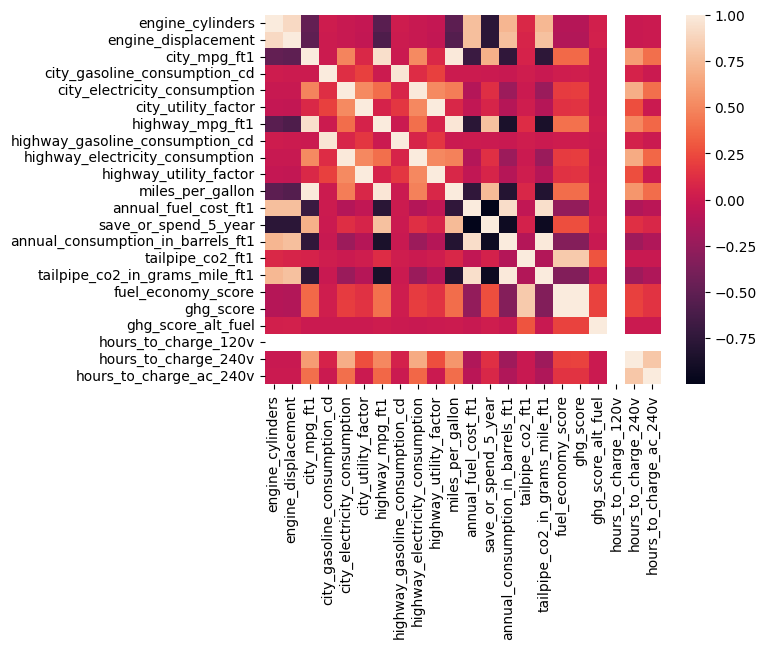

In [ ]:
sns.heatmap(temp.corr(numeric_only=True))

In [ ]:
temp.drop('hours_to_charge_120v',axis=1,inplace=True)

In [ ]:
temp.head(50)

,class,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,...,annual_fuel_cost_ft1,save_or_spend_5_year,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,fuel_economy_score,ghg_score,ghg_score_alt_fuel,hours_to_charge_240v,hours_to_charge_ac_240v
0,Minicompact Cars,Front-Wheel Drive,Manual 5-Speed,6.0,2.5,Regular Gasoline,17,0.0,0.0,0.0,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
1,Minicompact Cars,Front-Wheel Drive,Manual 5-Speed,6.0,2.5,Regular Gasoline,17,0.0,0.0,0.0,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
2,Two Seaters,Front-Wheel Drive,Manual 5-Speed,4.0,2.0,Regular Gasoline,18,0.0,0.0,0.0,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
3,Two Seaters,Front-Wheel Drive,Manual 5-Speed,4.0,2.0,Regular Gasoline,18,0.0,0.0,0.0,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
4,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,4.0,2.5,Regular Gasoline,18,0.0,0.0,0.0,...,2050,-3500,19.388824,-1,522.764706,-1,-1,-1,0.0,0.0
5,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,4.0,2.5,Regular Gasoline,18,0.0,0.0,0.0,...,2050,-3500,19.388824,-1,522.764706,-1,-1,-1,0.0,0.0
6,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,6.0,4.2,Regular Gasoline,13,0.0,0.0,0.0,...,2700,-6750,25.354615,-1,683.615385,-1,-1,-1,0.0,0.0
7,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,6.0,4.2,Regular Gasoline,13,0.0,0.0,0.0,...,2700,-6750,25.354615,-1,683.615385,-1,-1,-1,0.0,0.0
8,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,6.0,4.2,Regular Gasoline,15,0.0,0.0,0.0,...,2050,-3500,19.388824,-1,522.764706,-1,-1,-1,0.0,0.0
9,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,6.0,4.2,Regular Gasoline,15,0.0,0.0,0.0,...,2050,-3500,19.388824,-1,522.764706,-1,-1,-1,0.0,0.0


Assigning the dataframe to a new variable named 'df1'

In [ ]:
df1=temp
df1

,class,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,...,annual_fuel_cost_ft1,save_or_spend_5_year,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,fuel_economy_score,ghg_score,ghg_score_alt_fuel,hours_to_charge_240v,hours_to_charge_ac_240v
0,Minicompact Cars,Front-Wheel Drive,Manual 5-Speed,6.0,2.5,Regular Gasoline,17,0.0000,0.0,0.000,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
1,Minicompact Cars,Front-Wheel Drive,Manual 5-Speed,6.0,2.5,Regular Gasoline,17,0.0000,0.0,0.000,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
2,Two Seaters,Front-Wheel Drive,Manual 5-Speed,4.0,2.0,Regular Gasoline,18,0.0000,0.0,0.000,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
3,Two Seaters,Front-Wheel Drive,Manual 5-Speed,4.0,2.0,Regular Gasoline,18,0.0000,0.0,0.000,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
4,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,4.0,2.5,Regular Gasoline,18,0.0000,0.0,0.000,...,2050,-3500,19.388824,-1,522.764706,-1,-1,-1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),4.0,2.0,Regular Gasoline,23,0.0000,0.0,0.000,...,1350,0,12.677308,348,348.000000,6,6,-1,0.0,0.0
38109,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),4.0,2.0,Premium Gasoline,20,0.0000,0.0,0.000,...,1900,-2750,14.982273,399,399.000000,5,5,-1,0.0,0.0
38110,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),4.0,2.0,Premium Gasoline,22,0.0000,0.0,0.000,...,1850,-2500,14.330870,384,384.000000,5,5,-1,0.0,0.0
38111,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),4.0,2.0,Premium Gasoline,24,0.0541,60.0,0.351,...,1700,-750,8.652550,238,238.000000,7,8,-1,3.0,0.0


Finding unique elements of columns

In [ ]:
for i in df1.columns:
  print(i)
  print('-'*100)
  print(df[i].unique())
  print('='*100)

class
----------------------------------------------------------------------------------------------------
['Minicompact Cars' 'Two Seaters' 'Special Purpose Vehicle 2WD'
 'Special Purpose Vehicle 4WD' 'Subcompact Cars' 'Midsize Cars'
 'Midsize Station Wagons' 'Compact Cars' 'Midsize-Large Station Wagons'
 'Large Cars' 'Small Station Wagons' 'Standard Pickup Trucks 2WD'
 'Vans, Passenger Type' 'Vans, Cargo Type' 'Standard Pickup Trucks 4WD'
 'Special Purpose Vehicles' 'Small Pickup Trucks 2WD'
 'Small Pickup Trucks 4WD' 'Vans' 'Standard Pickup Trucks'
 'Small Pickup Trucks' 'Vans Passenger' 'Standard Pickup Trucks/2wd'
 'Special Purpose Vehicles/2wd' 'Special Purpose Vehicles/4wd'
 'Sport Utility Vehicle - 4WD' 'Sport Utility Vehicle - 2WD'
 'Minivan - 2WD' 'Minivan - 4WD' 'Special Purpose Vehicle'
 'Small Sport Utility Vehicle 4WD' 'Small Sport Utility Vehicle 2WD'
 'Standard Sport Utility Vehicle 4WD' 'Standard Sport Utility Vehicle 2WD']
drive
---------------------------------------

Analysing Target distribution using seaborn

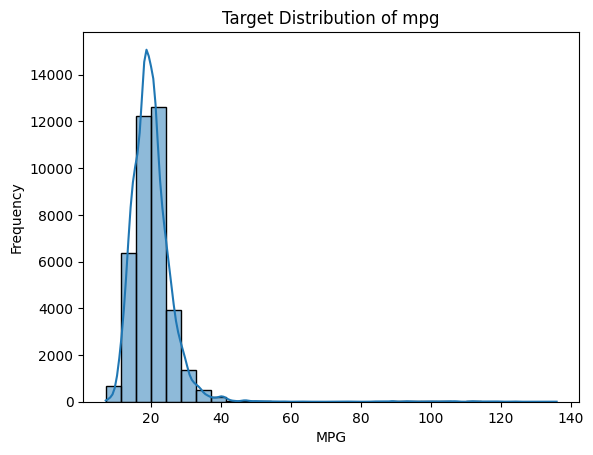

In [ ]:
sns.histplot(df1['miles_per_gallon'], kde=True, bins=30)
plt.title('Target Distribution of mpg')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

More defined hetmap of correlation matrix

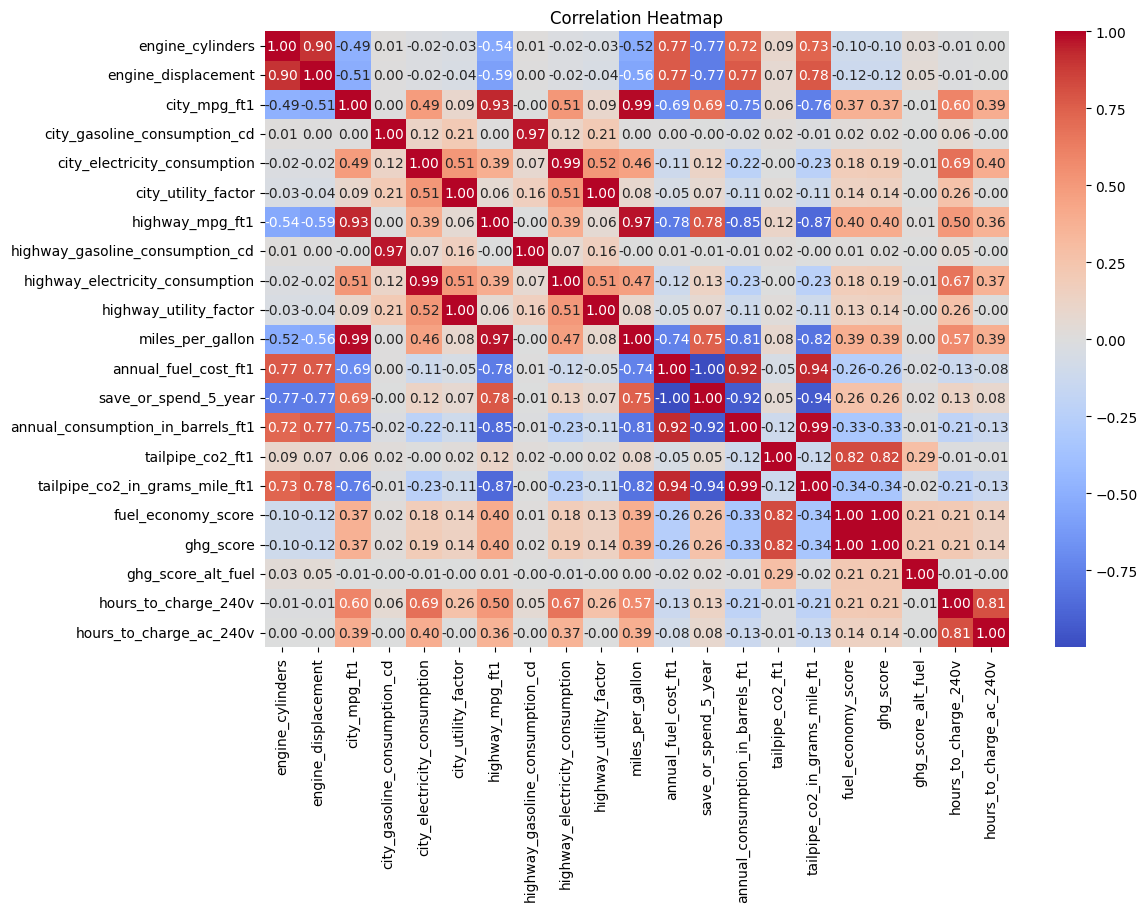

In [ ]:
# Compute correlation matrix
numerical_features = df1.select_dtypes(include='number').columns
correlation_matrix = df1[numerical_features].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df1['class'].count()

38113

Visualizing the relationship between input features and output feature

- Using boxplot for columns having object datatype

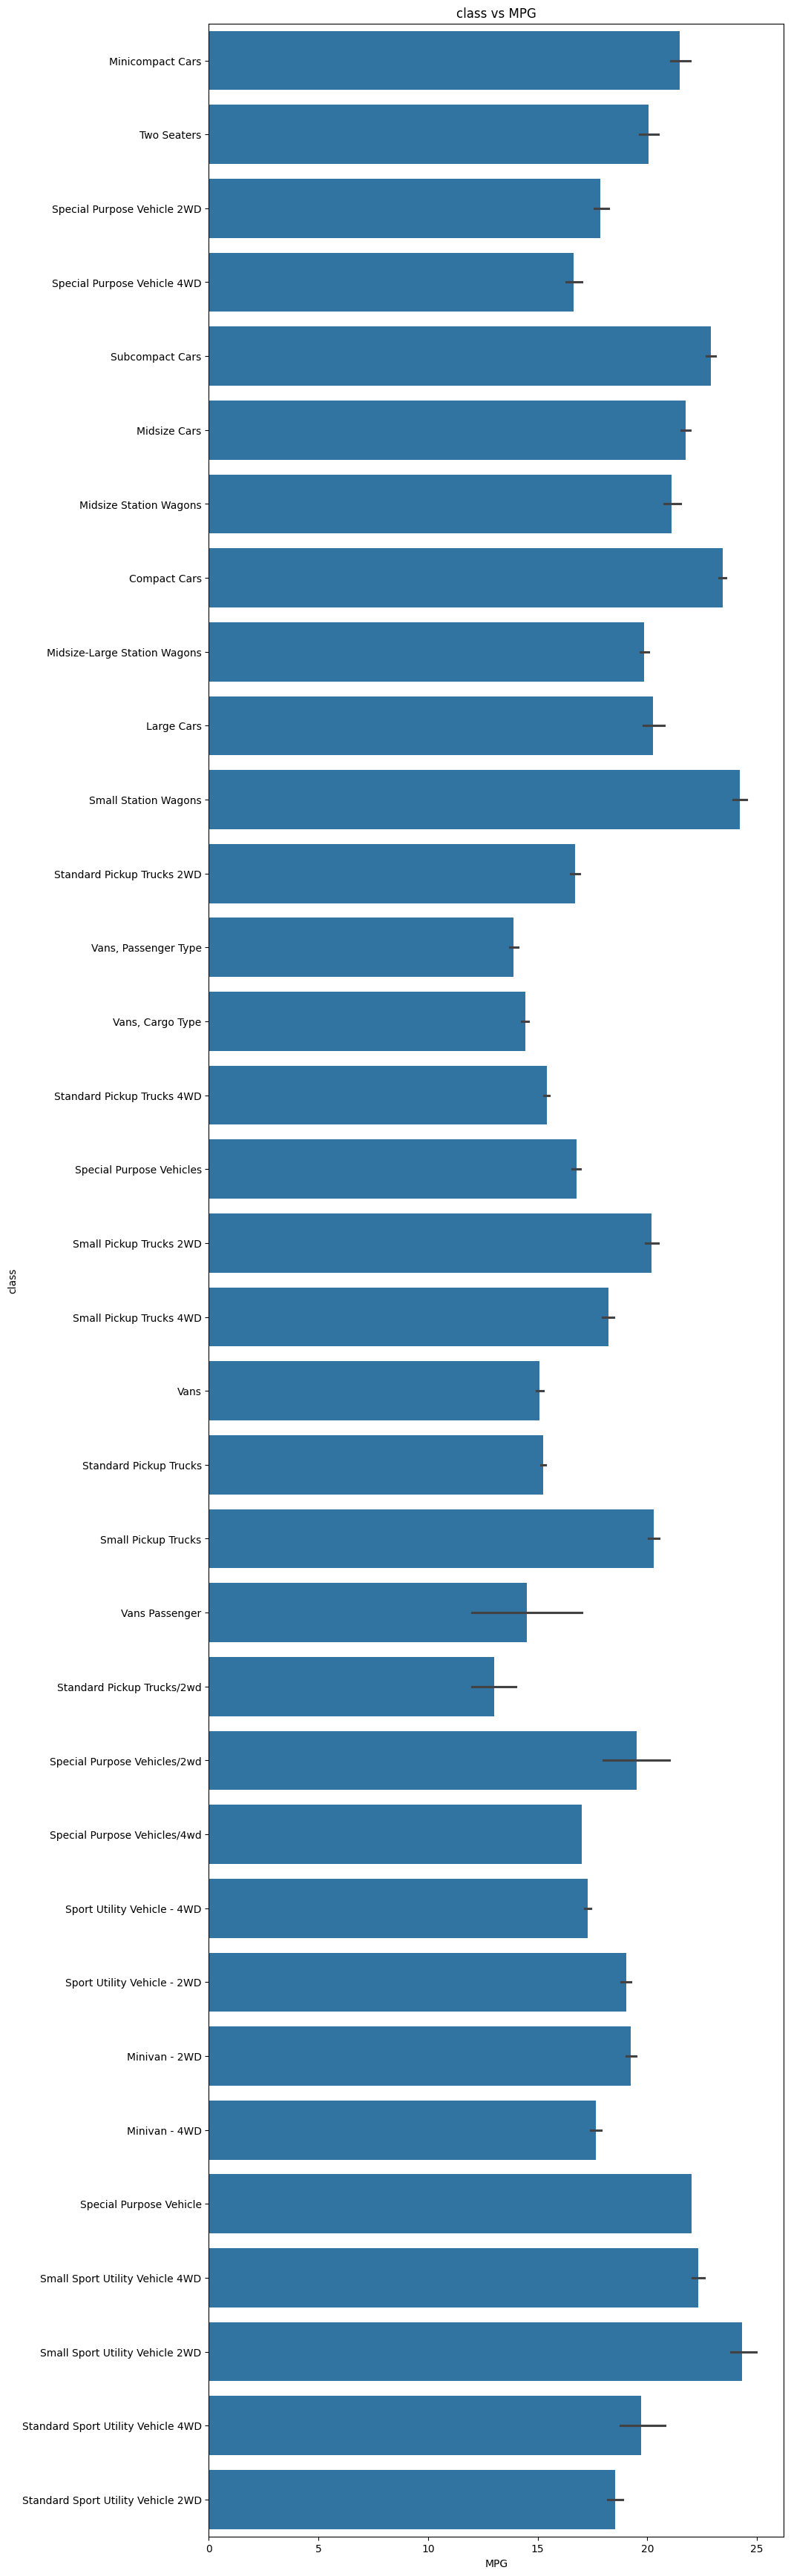

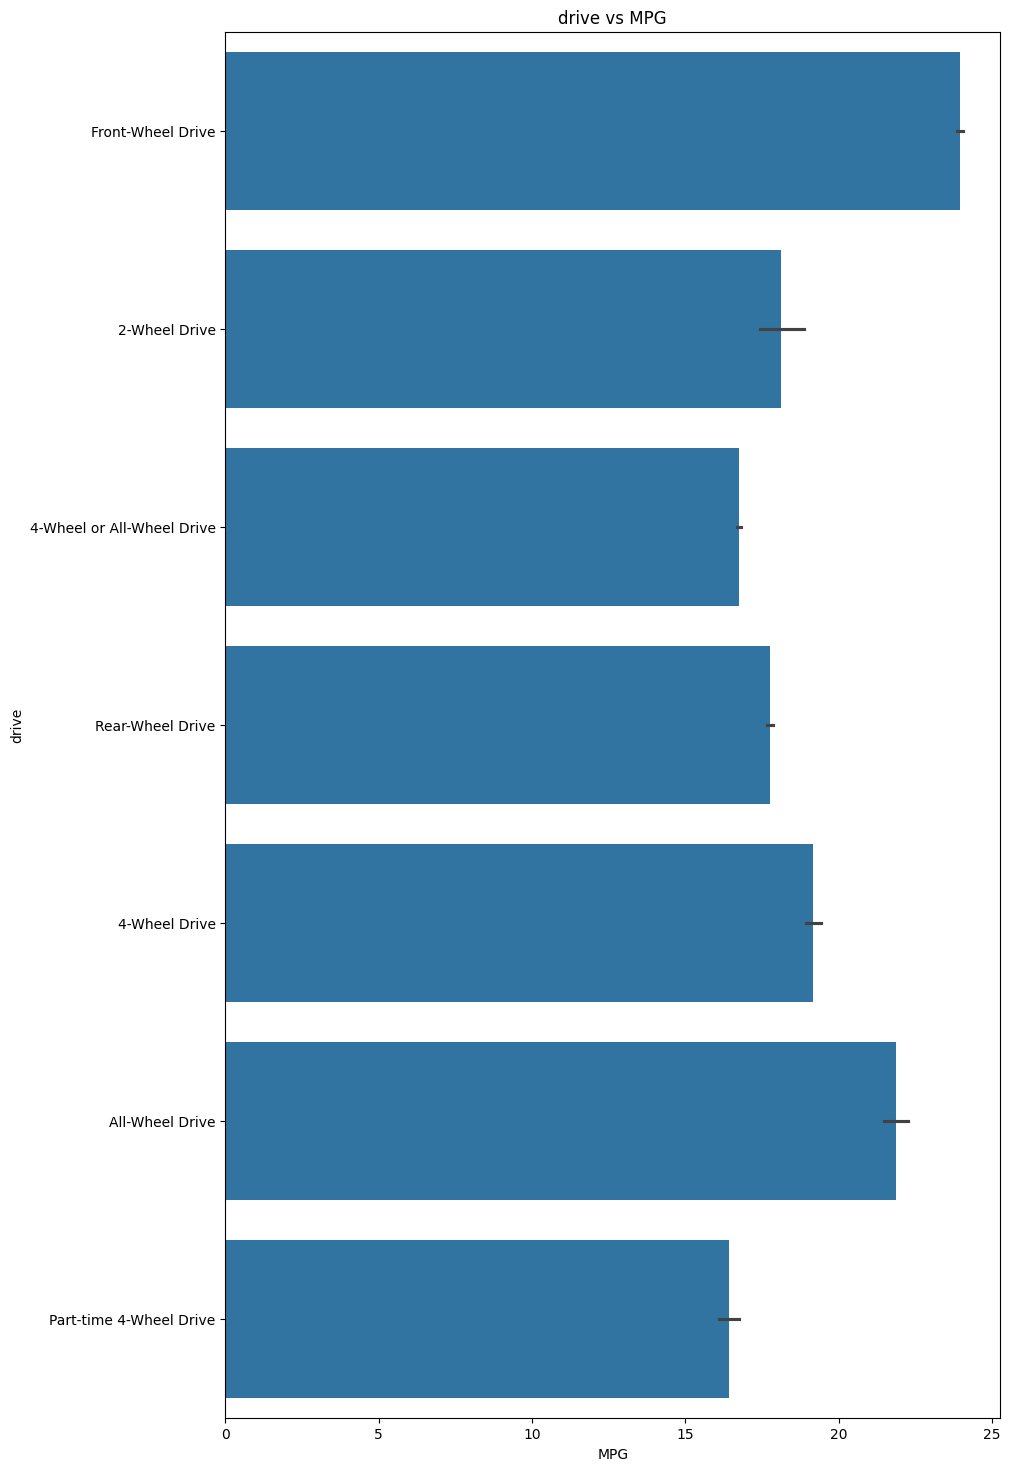

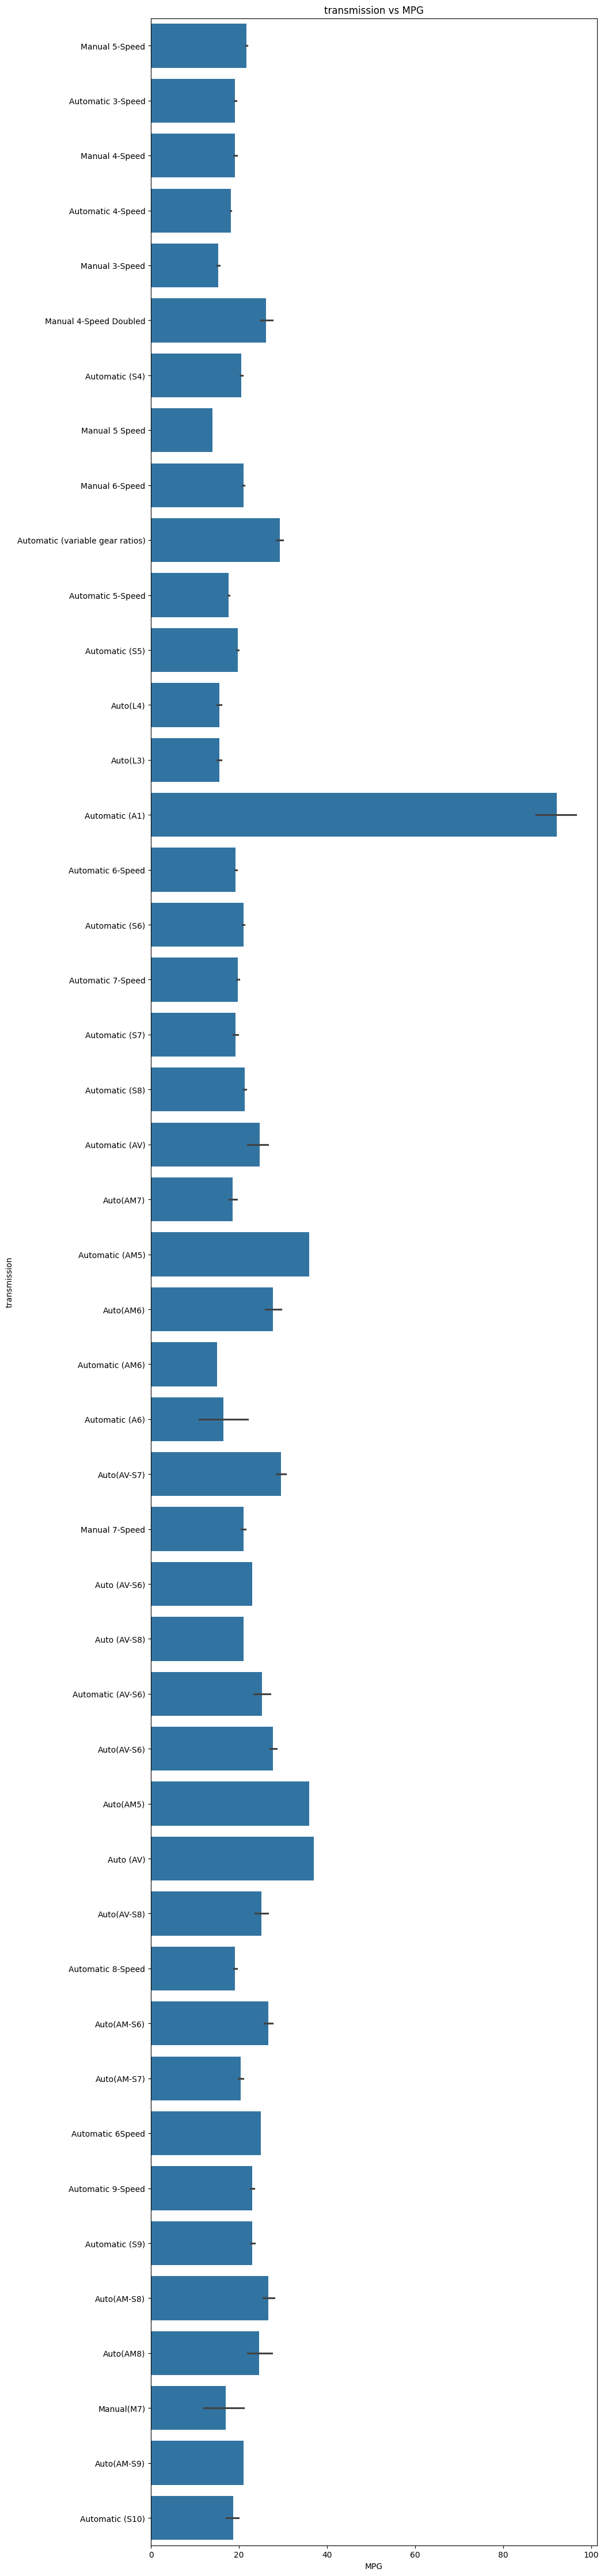

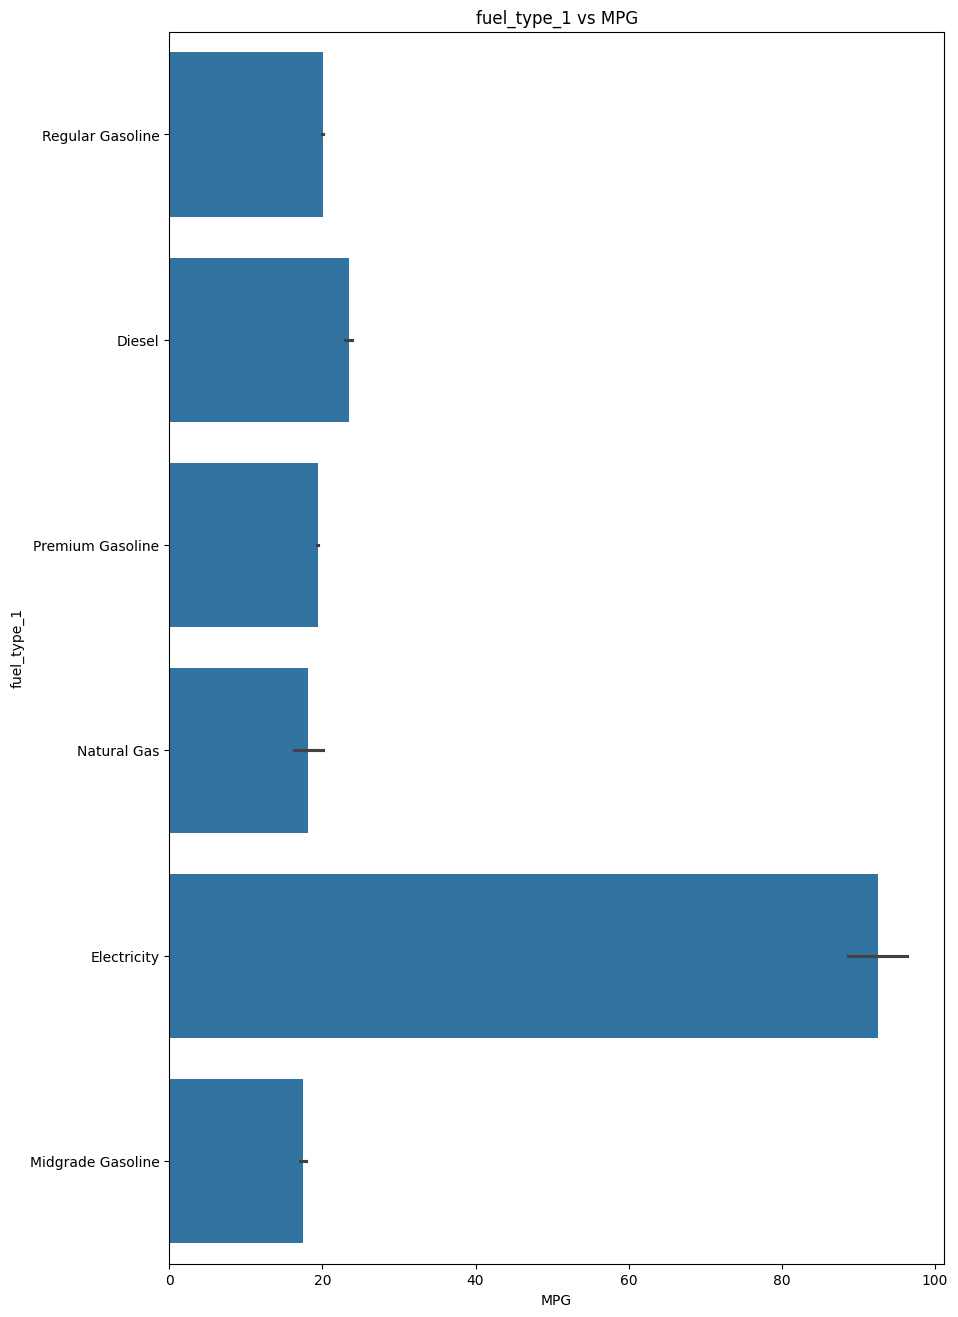

In [ ]:
for i in df1.select_dtypes(include='object'):
  length=len(df[i].unique())+10
  plt.figure(figsize=(10,length))
  sns.barplot(y=df1[i], x=df1['miles_per_gallon'], orient='h')
  plt.title(f'{i} vs MPG')
  plt.ylabel(i)
  plt.xlabel('MPG')
  plt.show()

Value counts of object columns having less than 10 unique values

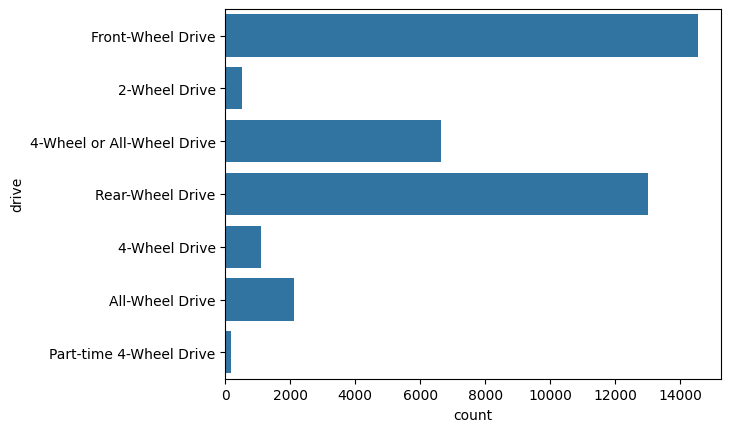

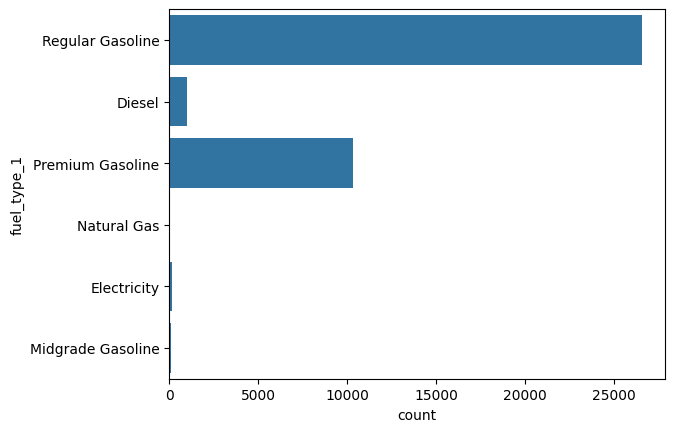

In [ ]:
for i in df1.select_dtypes(include='object'):
  if len(df1[i].unique())<10:
    sns.countplot(df1[i])
    plt.show()

Using scatterplot for columns having numeric datatype

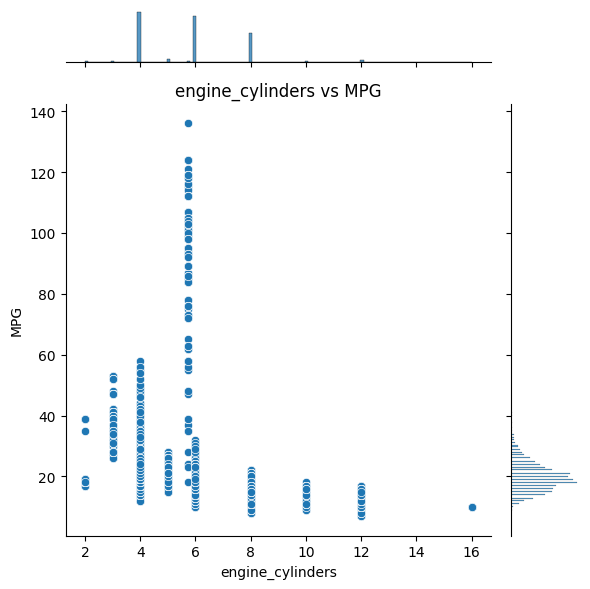

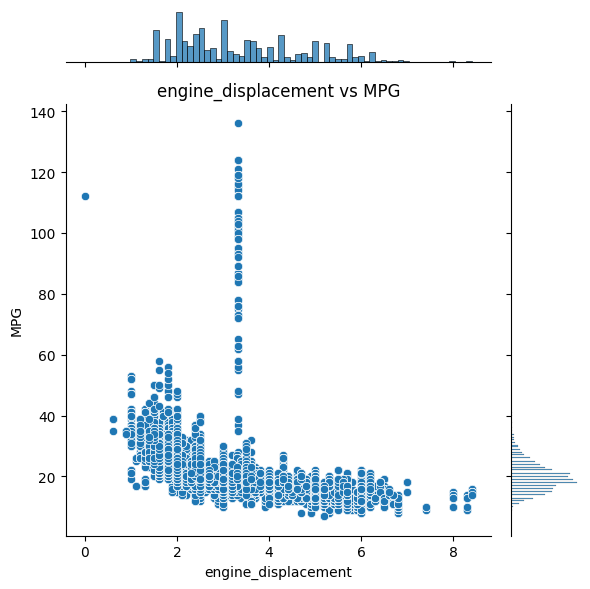

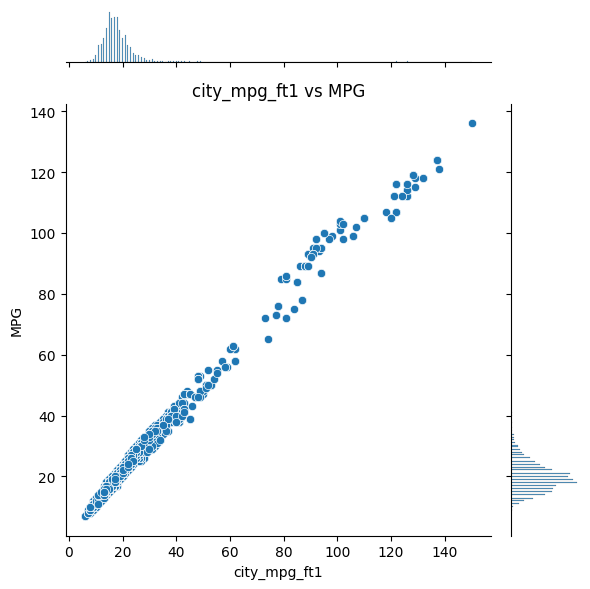

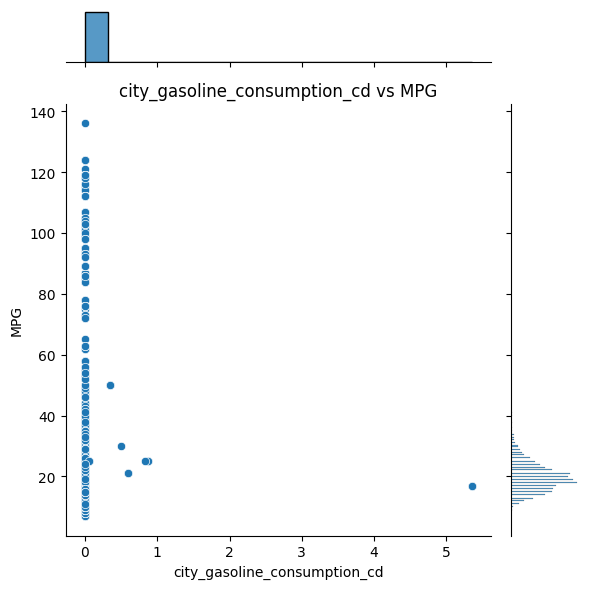

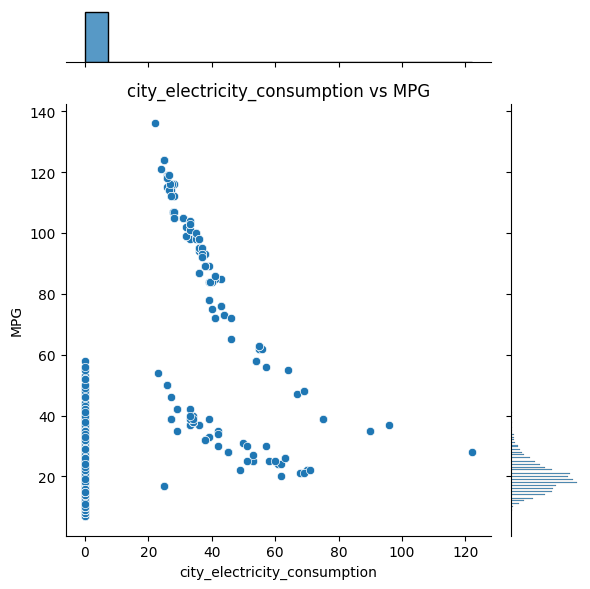

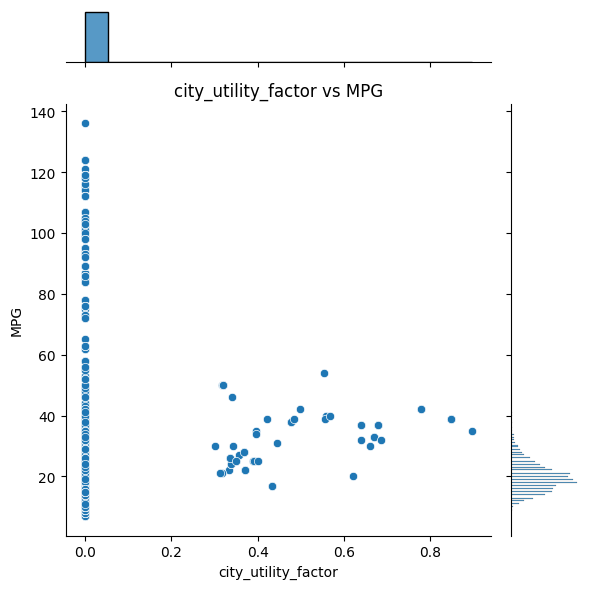

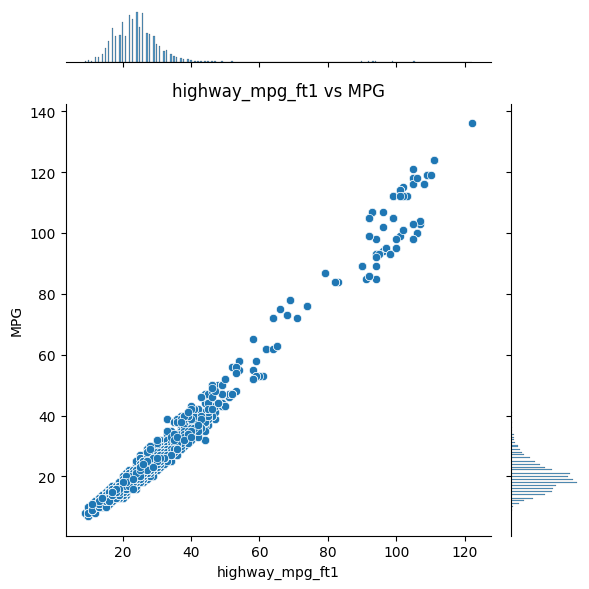

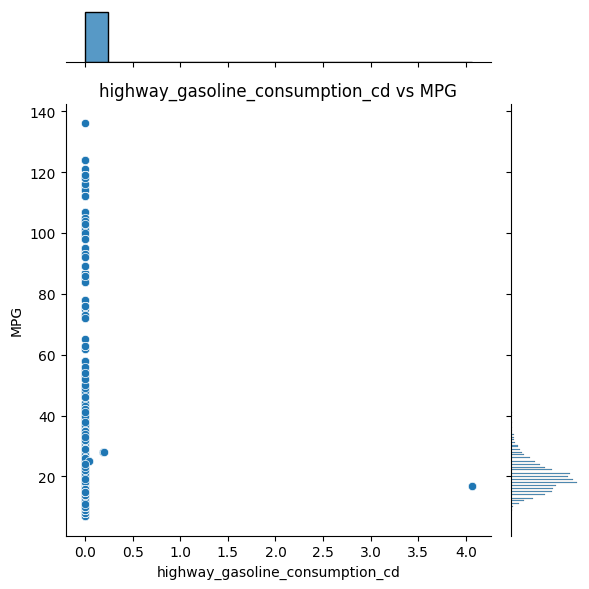

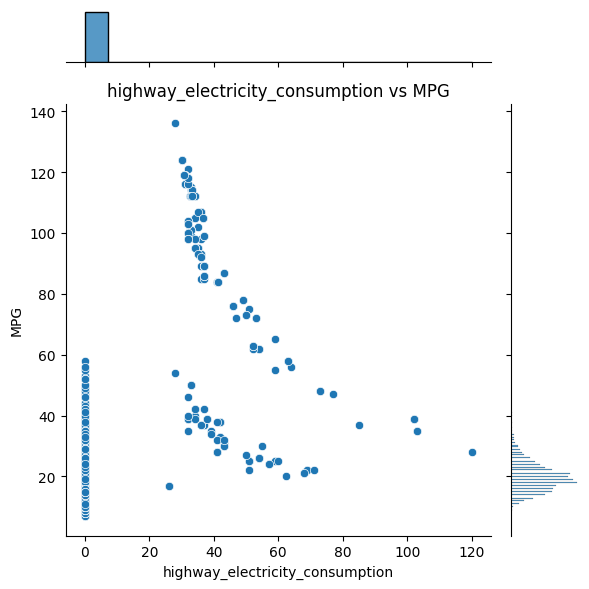

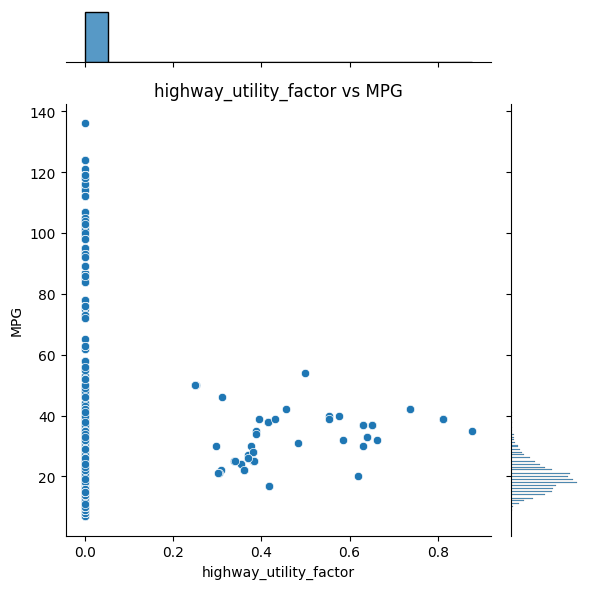

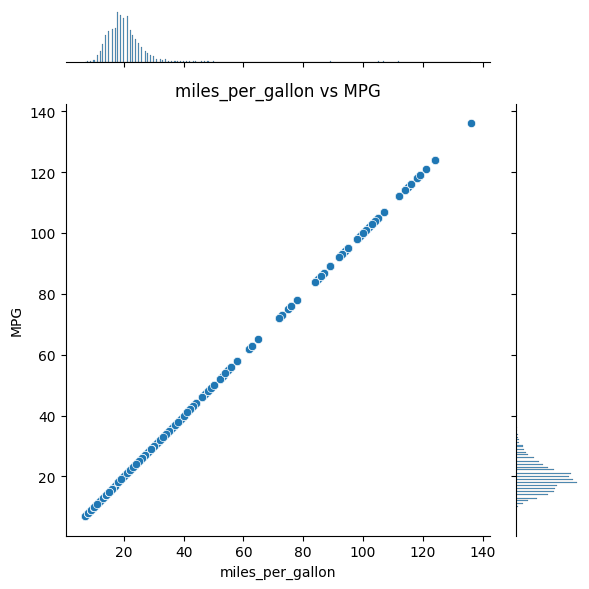

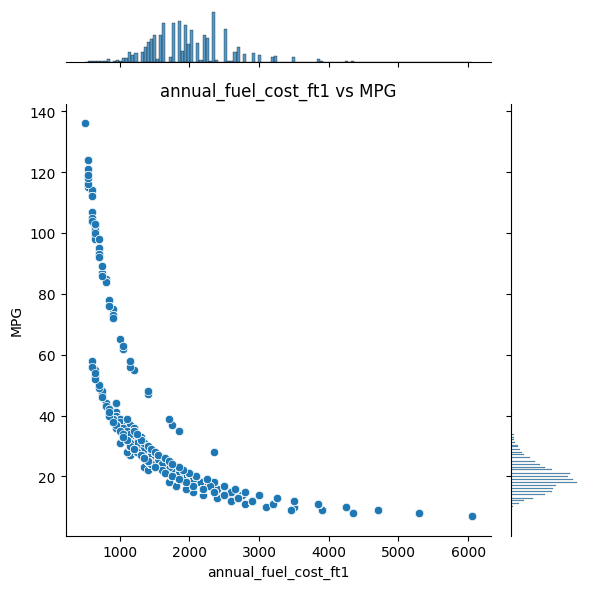

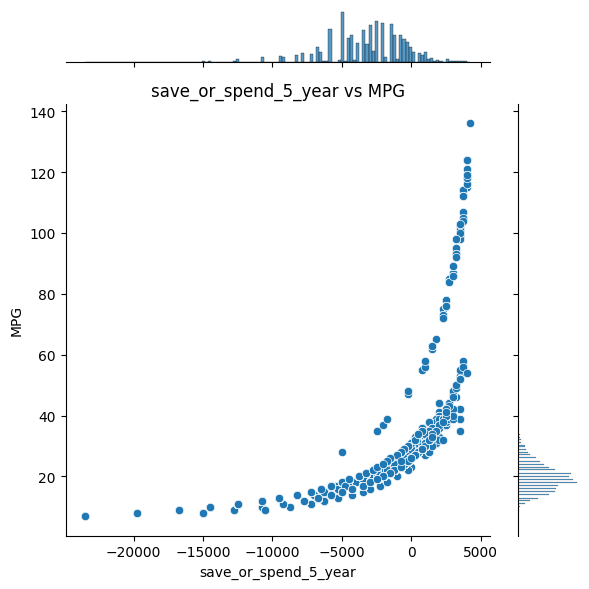

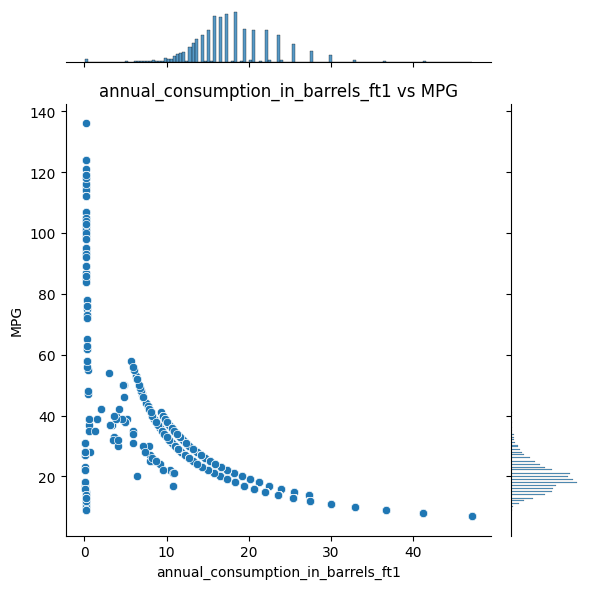

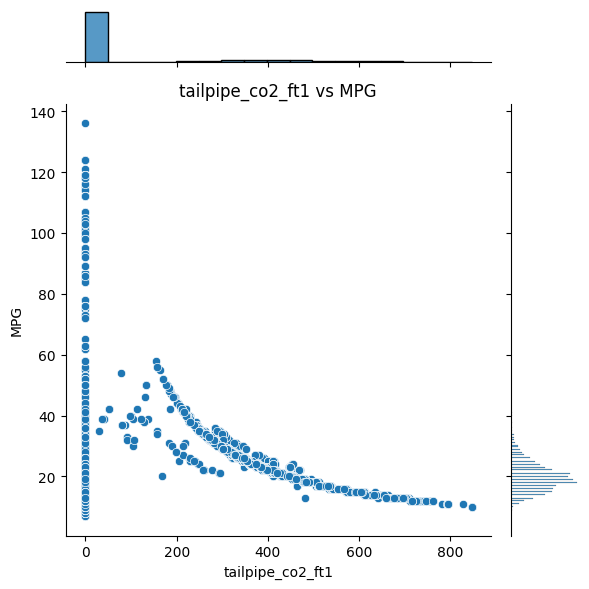

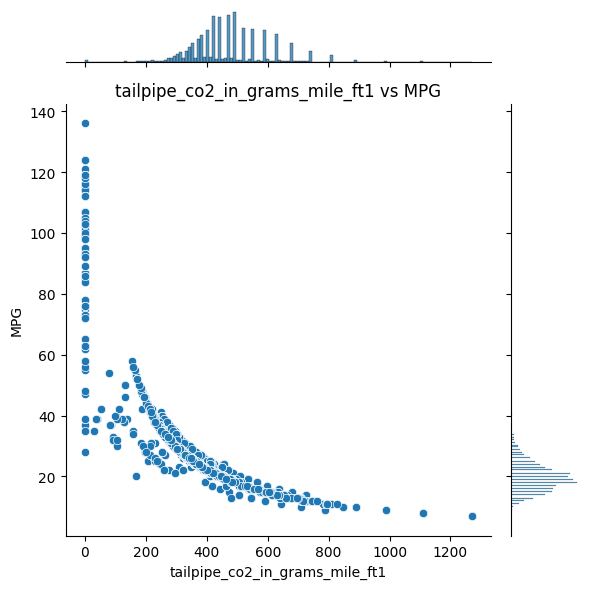

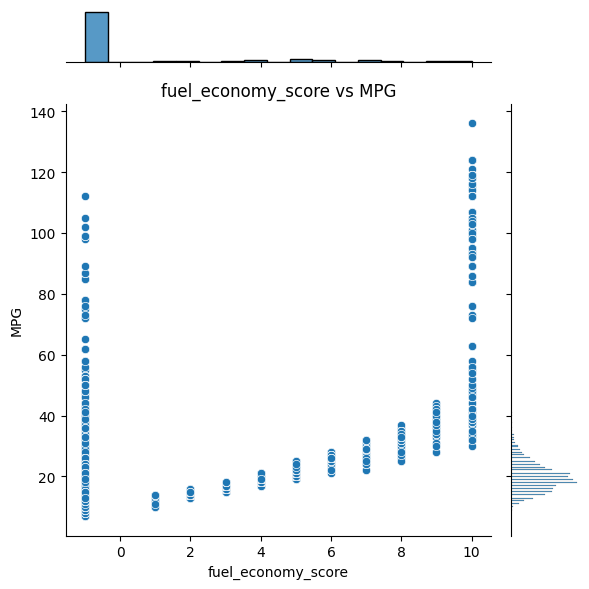

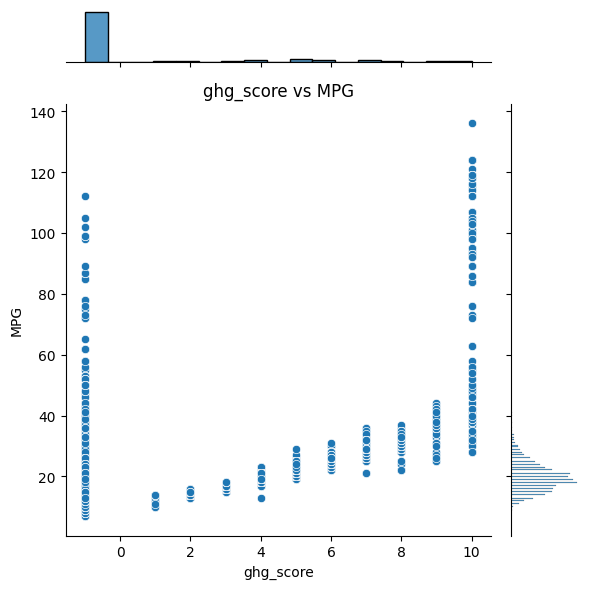

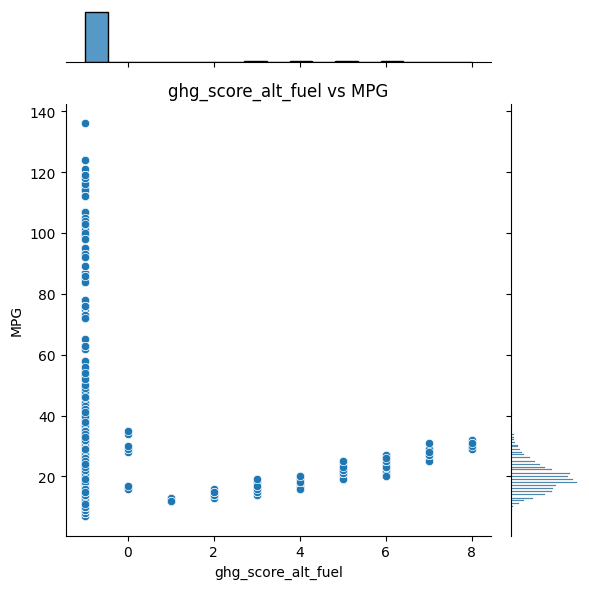

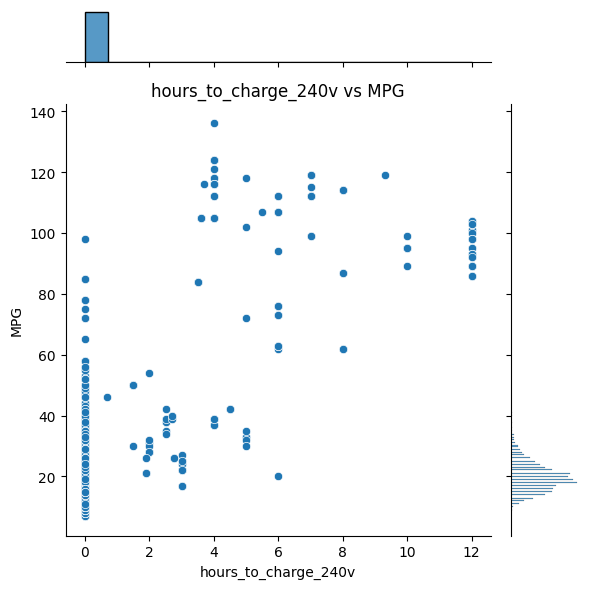

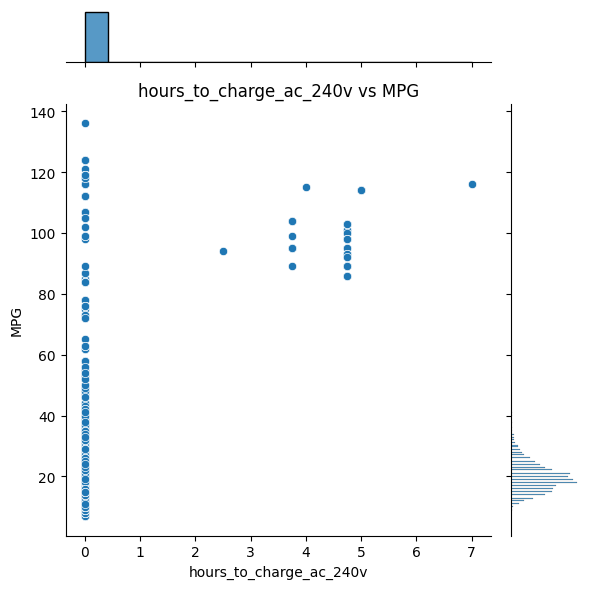

In [ ]:
for i in df1.select_dtypes(include='number'):
 sns.jointplot(x=df1[i], y=df1['miles_per_gallon'])
 plt.title(f'{i} vs MPG')
 plt.xlabel(f'{i}')
 plt.ylabel('MPG')
 plt.tight_layout()
 plt.show()


Checking Outliers

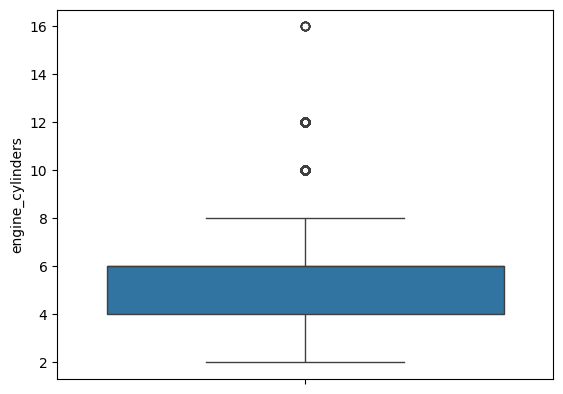

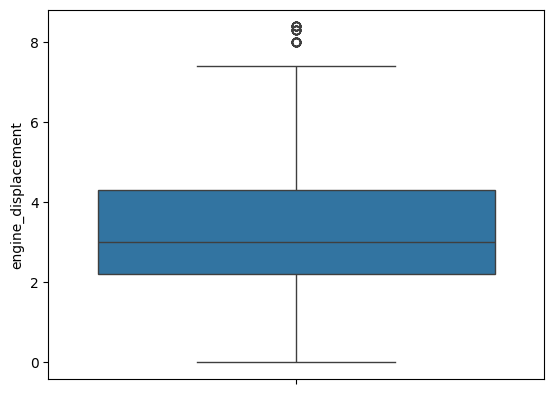

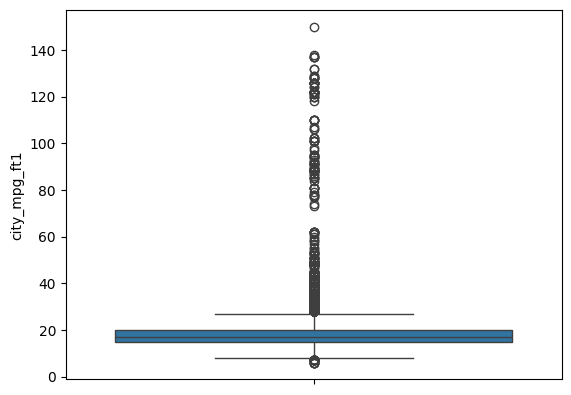

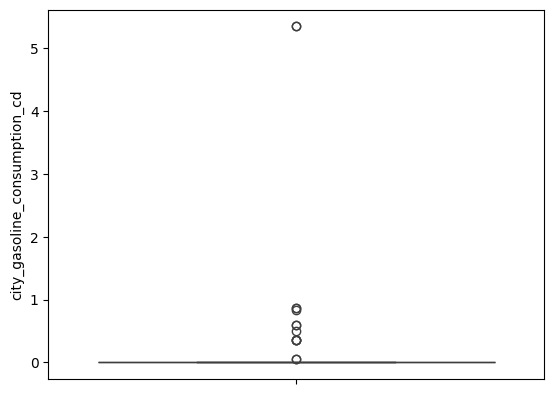

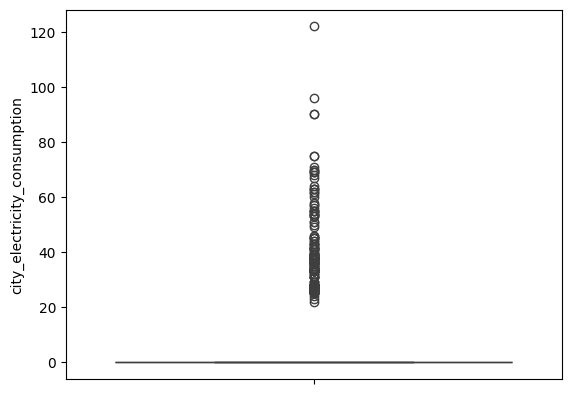

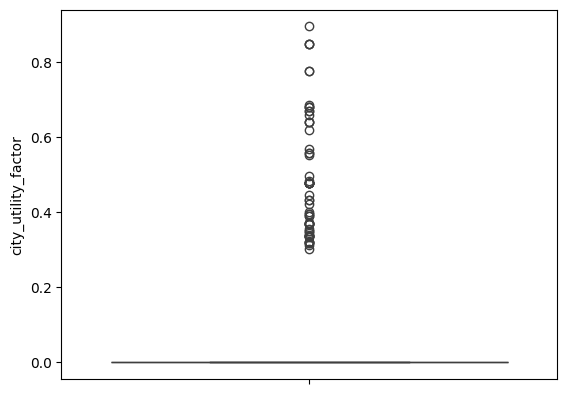

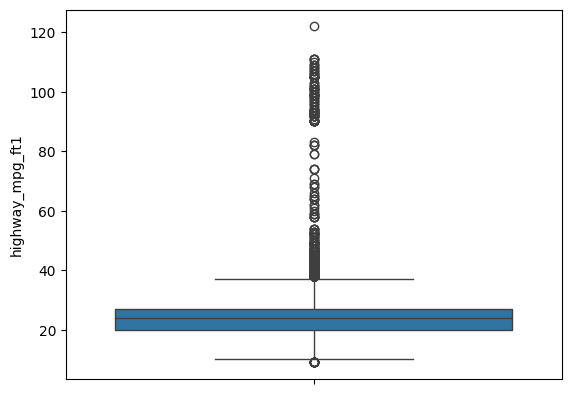

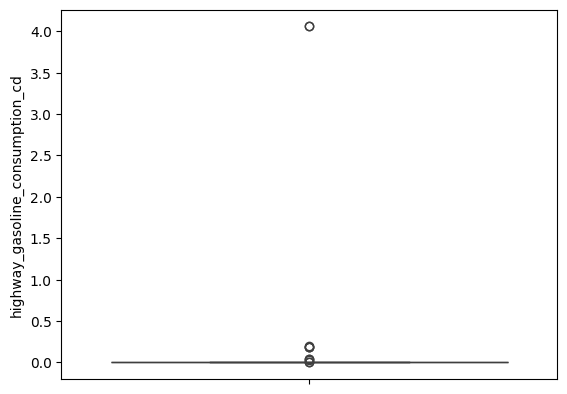

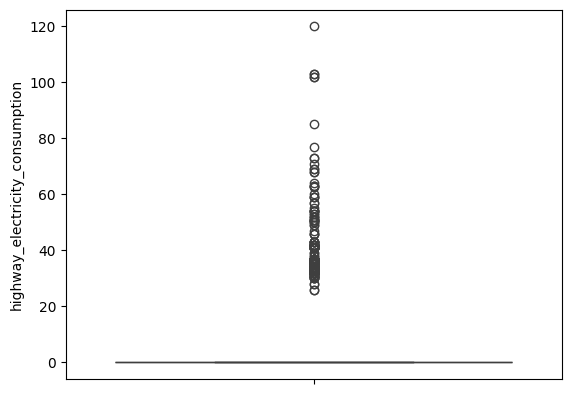

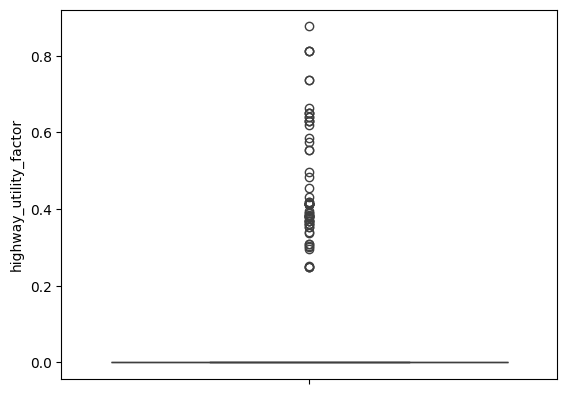

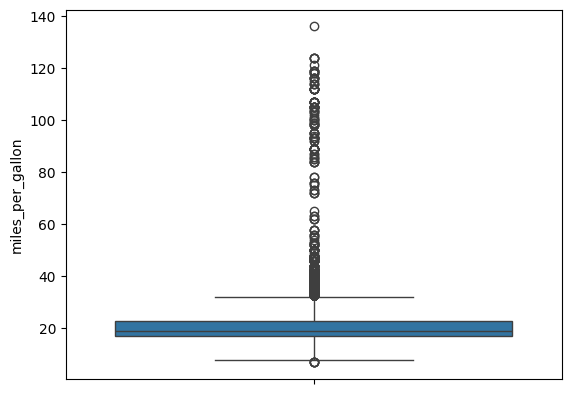

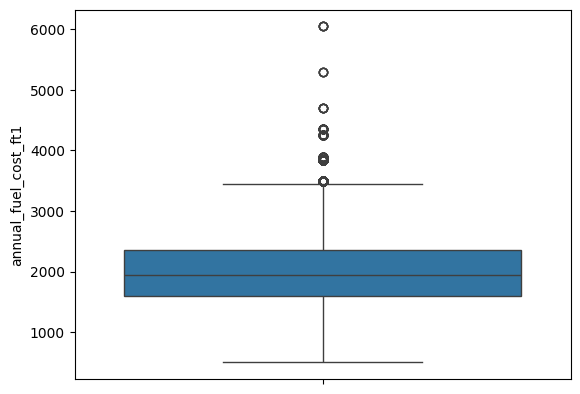

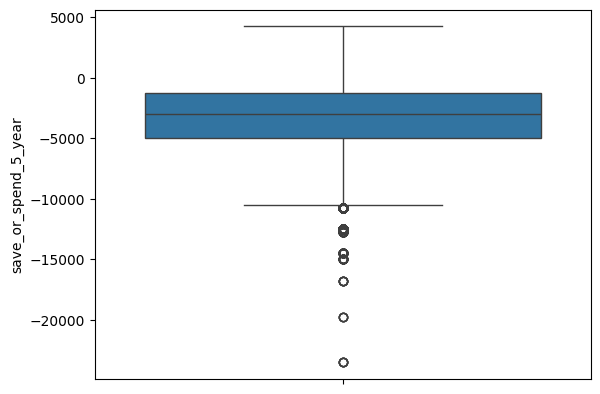

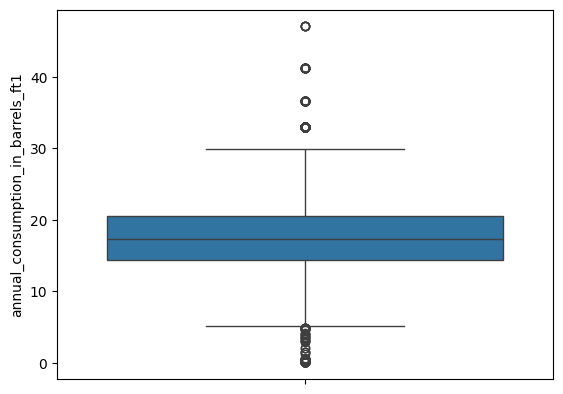

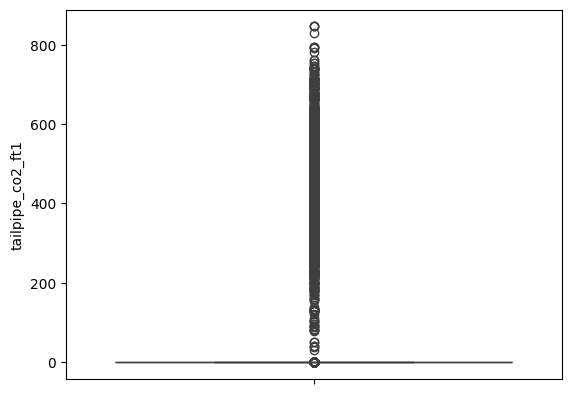

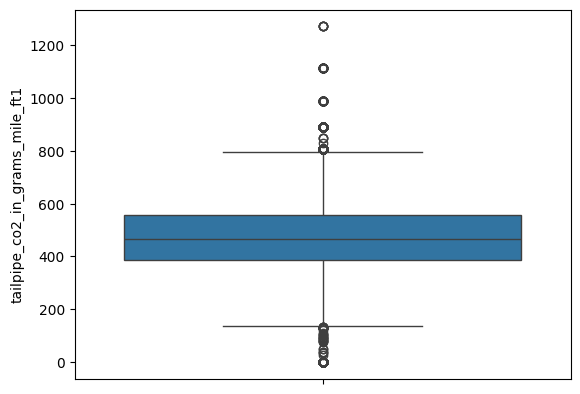

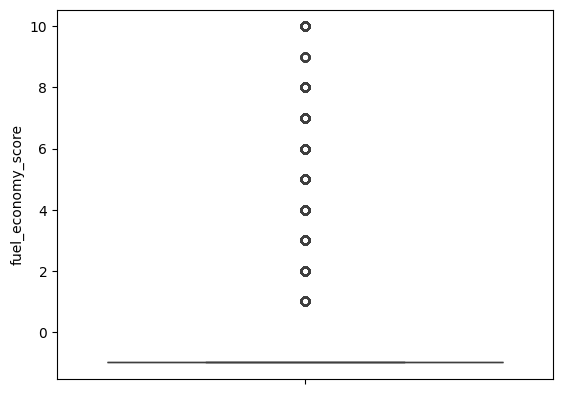

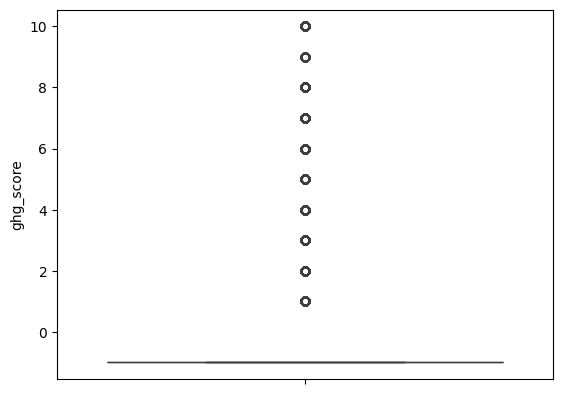

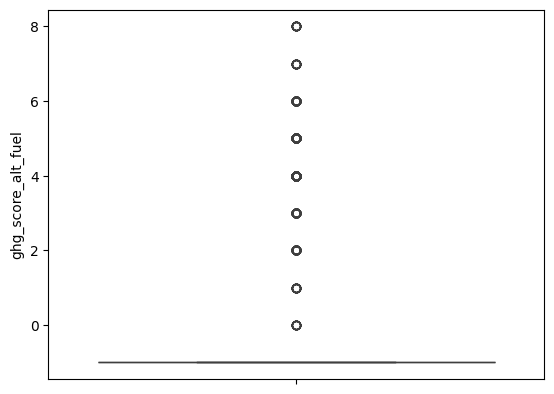

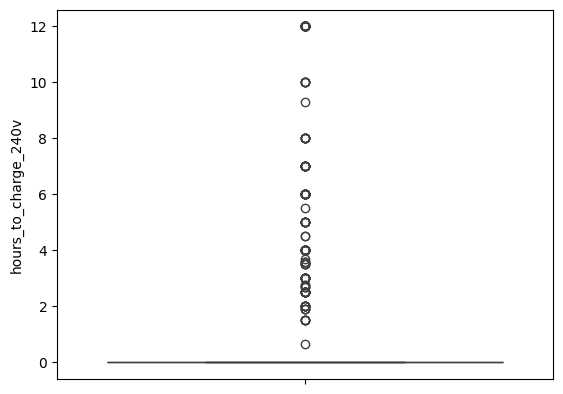

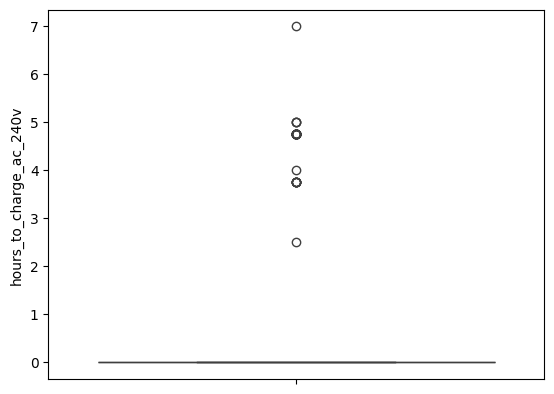

In [ ]:
for i in df1.select_dtypes(include='number'):
  sns.boxplot(y=i,data=df)
  plt.show()

Handling outliers using IQR Method

In [ ]:
df_cleaned=df1
for i in df1.select_dtypes(include='number'):
  Q1 = df1[i].quantile(0.25)
  Q3 = df1[i].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print(f"Lower Bound of {i}: {lower_bound}, Upper Bound of {i}: {upper_bound}")

  df_cleaned = df_cleaned[(df_cleaned[i] >= lower_bound) & (df_cleaned[i] <= upper_bound)]
df3=df_cleaned

Lower Bound of engine_cylinders: 1.0, Upper Bound of engine_cylinders: 9.0
Lower Bound of engine_displacement: -0.9499999999999993, Upper Bound of engine_displacement: 7.449999999999999
Lower Bound of city_mpg_ft1: 7.5, Upper Bound of city_mpg_ft1: 27.5
Lower Bound of city_gasoline_consumption_cd: 0.0, Upper Bound of city_gasoline_consumption_cd: 0.0
Lower Bound of city_electricity_consumption: 0.0, Upper Bound of city_electricity_consumption: 0.0
Lower Bound of city_utility_factor: 0.0, Upper Bound of city_utility_factor: 0.0
Lower Bound of highway_mpg_ft1: 9.5, Upper Bound of highway_mpg_ft1: 37.5
Lower Bound of highway_gasoline_consumption_cd: 0.0, Upper Bound of highway_gasoline_consumption_cd: 0.0
Lower Bound of highway_electricity_consumption: 0.0, Upper Bound of highway_electricity_consumption: 0.0
Lower Bound of highway_utility_factor: 0.0, Upper Bound of highway_utility_factor: 0.0
Lower Bound of miles_per_gallon: 8.0, Upper Bound of miles_per_gallon: 32.0
Lower Bound of annua

In [ ]:
class_objs=list((df3.iloc[:,0].drop_duplicates()).values)
drive_objs=list((df3.iloc[:,1].drop_duplicates()).values)
transmission_objs=list((df3.iloc[:,2].drop_duplicates()).values)
fuel_objs=list((df3.iloc[:,5].drop_duplicates()).values)

In [ ]:
class_objs

['Minicompact Cars',
 'Two Seaters',
 'Special Purpose Vehicle 2WD',
 'Special Purpose Vehicle 4WD',
 'Subcompact Cars',
 'Midsize Cars',
 'Midsize Station Wagons',
 'Compact Cars',
 'Midsize-Large Station Wagons',
 'Large Cars',
 'Small Station Wagons',
 'Standard Pickup Trucks 2WD',
 'Vans, Passenger Type',
 'Vans, Cargo Type',
 'Standard Pickup Trucks 4WD',
 'Special Purpose Vehicles',
 'Small Pickup Trucks 2WD',
 'Small Pickup Trucks 4WD',
 'Vans',
 'Standard Pickup Trucks',
 'Small Pickup Trucks',
 'Vans Passenger',
 'Standard Pickup Trucks/2wd',
 'Special Purpose Vehicles/2wd',
 'Special Purpose Vehicles/4wd',
 'Sport Utility Vehicle - 4WD',
 'Sport Utility Vehicle - 2WD',
 'Minivan - 2WD',
 'Minivan - 4WD',
 'Special Purpose Vehicle']

In [ ]:
drive_objs

['Front-Wheel Drive',
 '2-Wheel Drive',
 '4-Wheel or All-Wheel Drive',
 'Rear-Wheel Drive',
 '4-Wheel Drive',
 'All-Wheel Drive',
 'Part-time 4-Wheel Drive']

In [ ]:
transmission_objs

['Manual 5-Speed',
 'Automatic 3-Speed',
 'Manual 4-Speed',
 'Automatic 4-Speed',
 'Manual 3-Speed',
 'Manual 4-Speed Doubled',
 'Automatic (S4)',
 'Manual 5 Speed',
 'Manual 6-Speed',
 'Automatic 5-Speed',
 'Automatic (variable gear ratios)',
 'Automatic (S5)',
 'Auto(L4)',
 'Auto(L3)',
 'Automatic 6-Speed',
 'Automatic (S6)',
 'Automatic 7-Speed',
 'Automatic (S7)',
 'Automatic (S8)',
 'Automatic (AV)',
 'Auto(AM7)',
 'Auto(AM6)',
 'Automatic (AM6)',
 'Automatic (A6)',
 'Auto (AV-S6)',
 'Auto (AV-S8)',
 'Automatic (AV-S6)',
 'Auto(AV-S6)',
 'Auto(AV-S8)',
 'Automatic 8-Speed',
 'Auto(AM-S6)',
 'Auto(AM-S7)',
 'Manual 7-Speed']

In [ ]:
fuel_objs

['Regular Gasoline', 'Diesel', 'Premium Gasoline', 'Midgrade Gasoline']

Printing dataframe after removing rows having outliers

In [ ]:
df_cleaned

,class,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,...,annual_fuel_cost_ft1,save_or_spend_5_year,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,fuel_economy_score,ghg_score,ghg_score_alt_fuel,hours_to_charge_240v,hours_to_charge_ac_240v
0,Minicompact Cars,Front-Wheel Drive,Manual 5-Speed,6.0,2.5,Regular Gasoline,17,0.0,0.0,0.0,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
1,Minicompact Cars,Front-Wheel Drive,Manual 5-Speed,6.0,2.5,Regular Gasoline,17,0.0,0.0,0.0,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
2,Two Seaters,Front-Wheel Drive,Manual 5-Speed,4.0,2.0,Regular Gasoline,18,0.0,0.0,0.0,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
3,Two Seaters,Front-Wheel Drive,Manual 5-Speed,4.0,2.0,Regular Gasoline,18,0.0,0.0,0.0,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
4,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,4.0,2.5,Regular Gasoline,18,0.0,0.0,0.0,...,2050,-3500,19.388824,-1,522.764706,-1,-1,-1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31987,Sport Utility Vehicle - 4WD,All-Wheel Drive,Automatic (S6),6.0,3.2,Regular Gasoline,18,0.0,0.0,0.0,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
31988,Sport Utility Vehicle - 2WD,Front-Wheel Drive,Automatic (S6),6.0,3.2,Regular Gasoline,19,0.0,0.0,0.0,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
31989,Sport Utility Vehicle - 4WD,All-Wheel Drive,Automatic (S6),6.0,3.2,Regular Gasoline,16,0.0,0.0,0.0,...,1950,-3000,18.311667,-1,493.722222,-1,-1,-1,0.0,0.0
31990,Sport Utility Vehicle - 2WD,Front-Wheel Drive,Automatic (S6),6.0,3.2,Regular Gasoline,16,0.0,0.0,0.0,...,1850,-2500,17.347895,-1,467.736842,-1,-1,-1,0.0,0.0


Value counts of object columns having less than 10 unique values

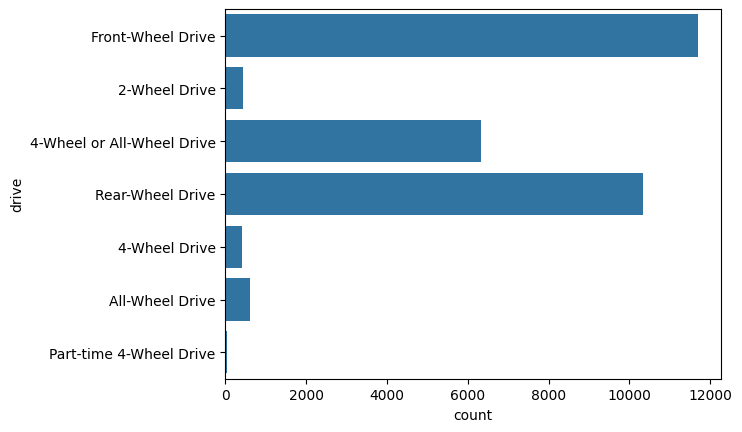

drive
Front-Wheel Drive             11687
Rear-Wheel Drive              10341
4-Wheel or All-Wheel Drive     6331
All-Wheel Drive                 610
2-Wheel Drive                   445
4-Wheel Drive                   425
Part-time 4-Wheel Drive          46
Name: count, dtype: int64


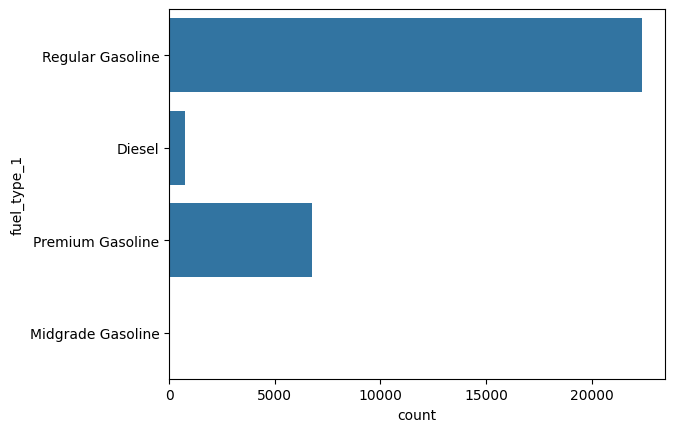

fuel_type_1
Regular Gasoline     22359
Premium Gasoline      6759
Diesel                 751
Midgrade Gasoline       16
Name: count, dtype: int64


In [ ]:
for i in df_cleaned.select_dtypes(include='object'):
  if len(df_cleaned[i].unique())<10:
    sns.countplot(df_cleaned[i])
    plt.show()
    print(df_cleaned[i].value_counts())

Comparing the row count of dataframe before and after cleaning

In [ ]:
print('Row count before cleaning: ',df.shape[0])
print('Row count after cleaning: ',df_cleaned.shape[0])
print('Difference: ',df.shape[0]-df_cleaned.shape[0])

Row count before cleaning:  38113
Row count after cleaning:  29885
Difference:  8228


Checking after removing outliers

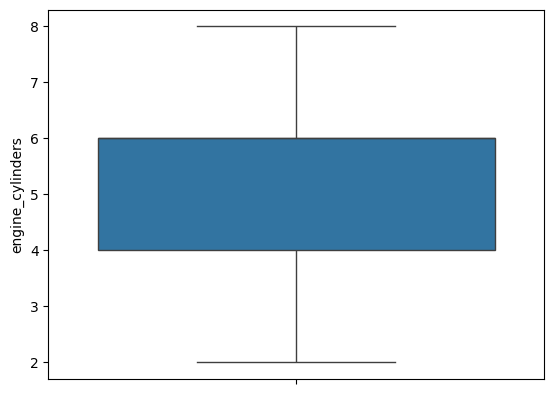

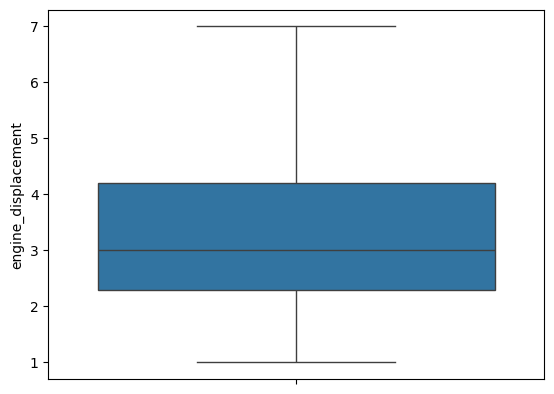

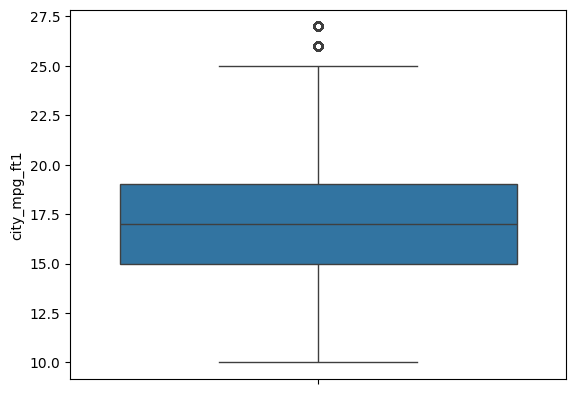

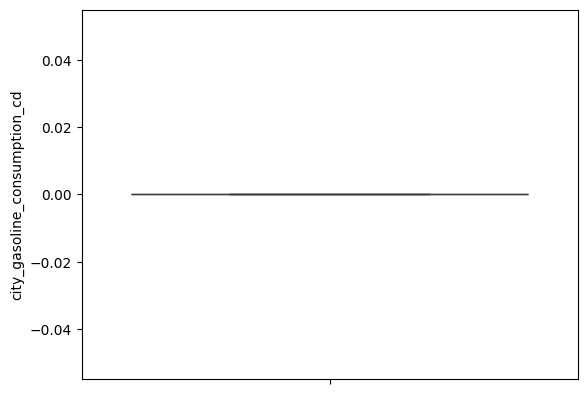

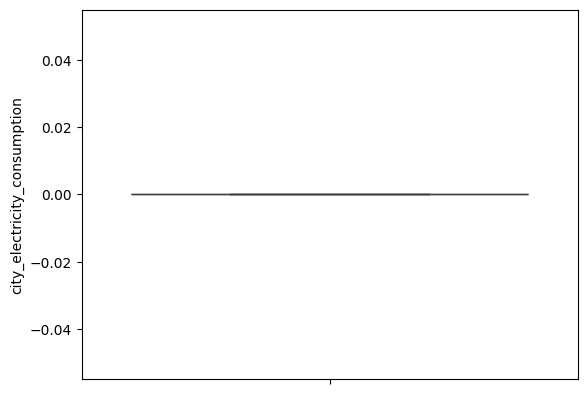

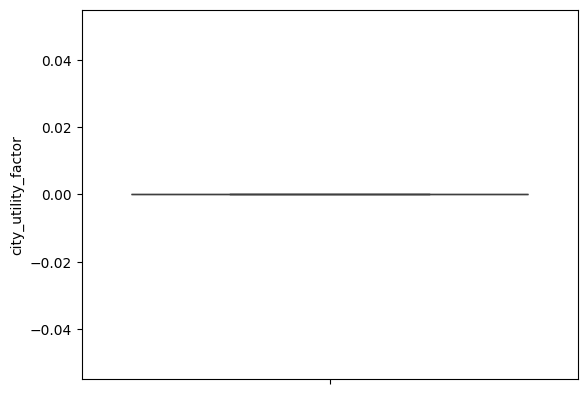

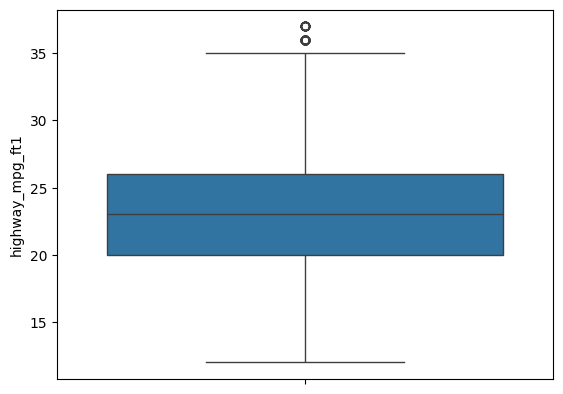

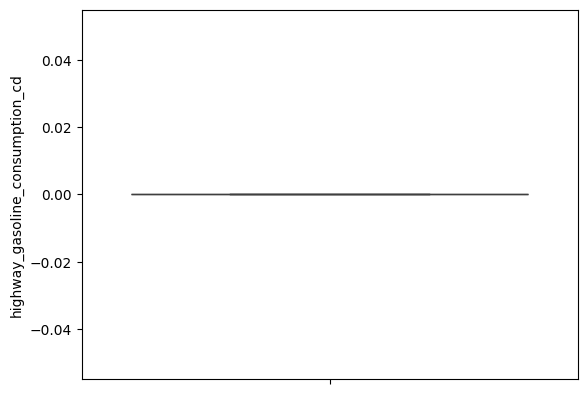

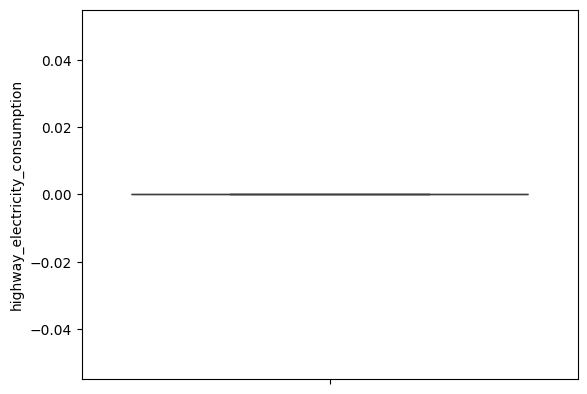

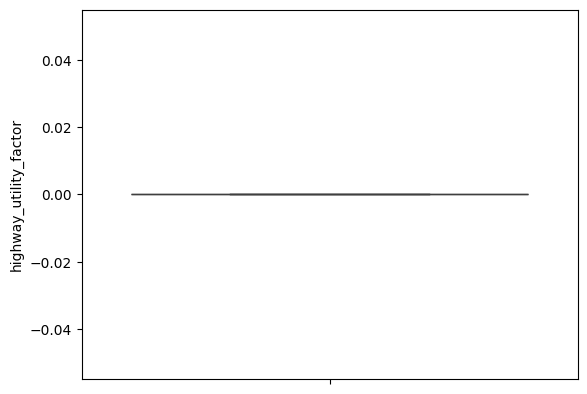

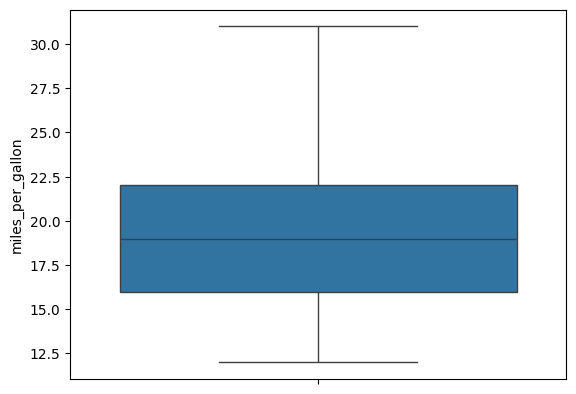

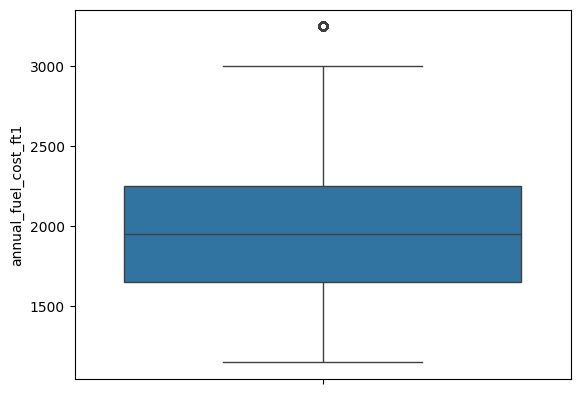

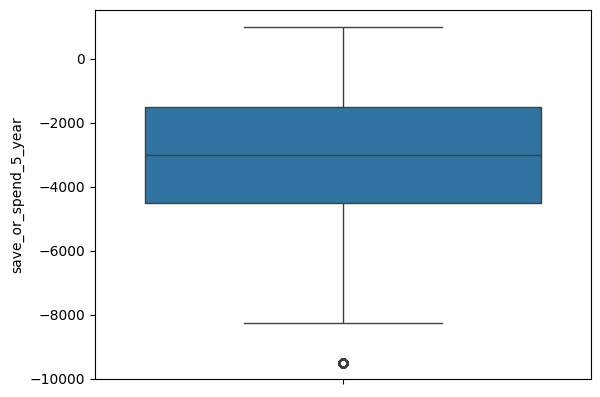

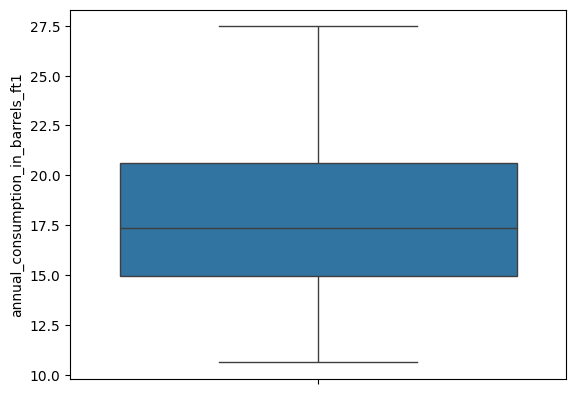

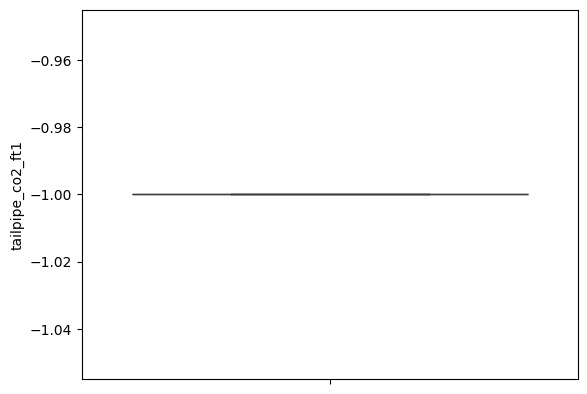

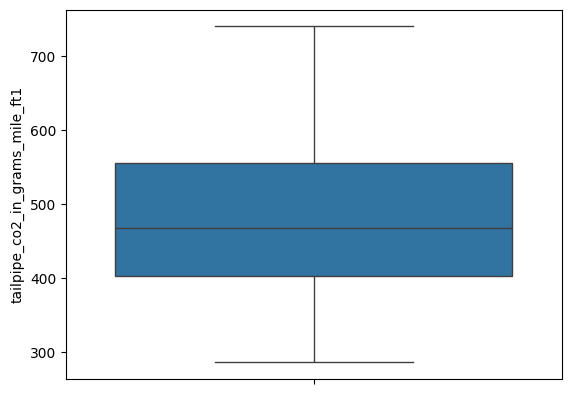

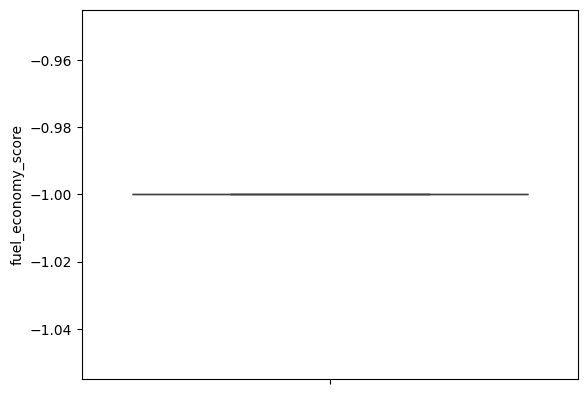

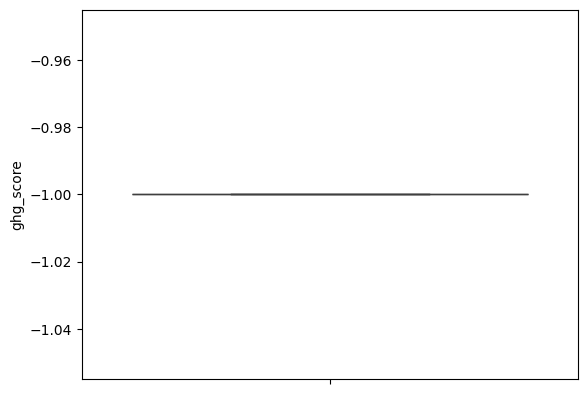

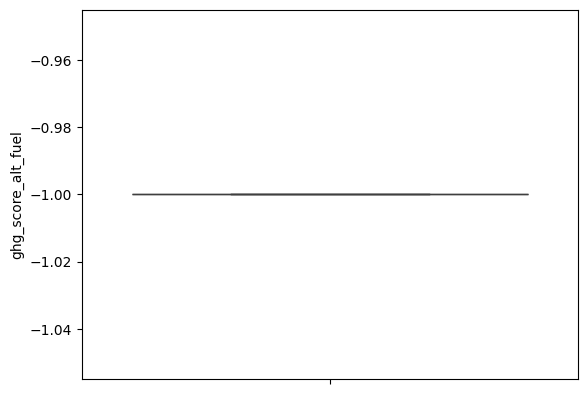

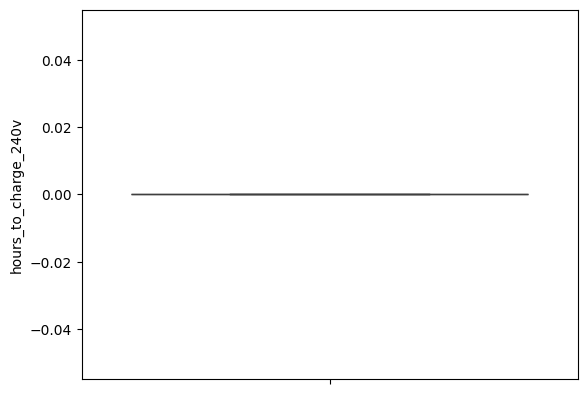

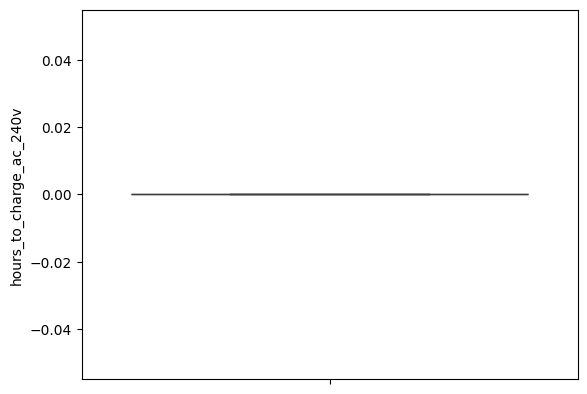

In [ ]:
for i in df_cleaned.select_dtypes(include='number'):
  sns.boxplot(y=i,data=df_cleaned)
  plt.show()

In [ ]:
df_cleaned.columns

Index(['class', 'drive', 'transmission', 'engine_cylinders',
       'engine_displacement', 'fuel_type_1', 'city_mpg_ft1',
       'city_gasoline_consumption_cd', 'city_electricity_consumption',
       'city_utility_factor', 'highway_mpg_ft1',
       'highway_gasoline_consumption_cd', 'highway_electricity_consumption',
       'highway_utility_factor', 'miles_per_gallon', 'annual_fuel_cost_ft1',
       'save_or_spend_5_year', 'annual_consumption_in_barrels_ft1',
       'tailpipe_co2_ft1', 'tailpipe_co2_in_grams_mile_ft1',
       'fuel_economy_score', 'ghg_score', 'ghg_score_alt_fuel',
       'hours_to_charge_240v', 'hours_to_charge_ac_240v'],
      dtype='object')

Collecting column names based on unique values

In [ ]:
low_unq=[]
high_unq=[]
null_unq=[]

for i in df_cleaned.select_dtypes(include='object'):
  if len(df_cleaned[i].unique())>10:
    print('Unique values above 10: ',i)
    print(df_cleaned[i].unique())
    high_unq.append(i)
    print('='*100)
  elif len(df_cleaned[i].unique())<10:
    print('Unique values less than 10: ',i)
    print(df_cleaned[i].unique())
    low_unq.append(i)
    print('='*100)
  elif len(df_cleaned[i].unique())==0:
    print('Null values: ',i)
    print(df_cleaned[i].unique())
    null_unq.append(i)
    print('='*100)

print('Low unqiue columns: ', low_unq)
print('High unqiue columns: ', high_unq)
print('Null unique columns: ',null_unq)

Unique values above 10:  class
['Minicompact Cars' 'Two Seaters' 'Special Purpose Vehicle 2WD'
 'Special Purpose Vehicle 4WD' 'Subcompact Cars' 'Midsize Cars'
 'Midsize Station Wagons' 'Compact Cars' 'Midsize-Large Station Wagons'
 'Large Cars' 'Small Station Wagons' 'Standard Pickup Trucks 2WD'
 'Vans, Passenger Type' 'Vans, Cargo Type' 'Standard Pickup Trucks 4WD'
 'Special Purpose Vehicles' 'Small Pickup Trucks 2WD'
 'Small Pickup Trucks 4WD' 'Vans' 'Standard Pickup Trucks'
 'Small Pickup Trucks' 'Vans Passenger' 'Standard Pickup Trucks/2wd'
 'Special Purpose Vehicles/2wd' 'Special Purpose Vehicles/4wd'
 'Sport Utility Vehicle - 4WD' 'Sport Utility Vehicle - 2WD'
 'Minivan - 2WD' 'Minivan - 4WD' 'Special Purpose Vehicle']
Unique values less than 10:  drive
['Front-Wheel Drive' '2-Wheel Drive' '4-Wheel or All-Wheel Drive'
 'Rear-Wheel Drive' '4-Wheel Drive' 'All-Wheel Drive'
 'Part-time 4-Wheel Drive']
Unique values above 10:  transmission
['Manual 5-Speed' 'Automatic 3-Speed' 'Manua

Encoding
- Using LabelEncoder for columns having high unique values
- Using Get dummies for columns having low unique values

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

# Get dummies

encoded_df=pd.get_dummies(df_cleaned[low_unq],dtype=int,drop_first=True)

# Label Encoder

for i in high_unq:
  df_cleaned[i]=encoder.fit_transform(df_cleaned[i])

In [ ]:
df_cleaned

,class,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,...,annual_fuel_cost_ft1,save_or_spend_5_year,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,fuel_economy_score,ghg_score,ghg_score_alt_fuel,hours_to_charge_240v,hours_to_charge_ac_240v
0,5,Front-Wheel Drive,30,6.0,2.5,Regular Gasoline,17,0.0,0.0,0.0,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
1,5,Front-Wheel Drive,30,6.0,2.5,Regular Gasoline,17,0.0,0.0,0.0,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
2,25,Front-Wheel Drive,30,4.0,2.0,Regular Gasoline,18,0.0,0.0,0.0,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
3,25,Front-Wheel Drive,30,4.0,2.0,Regular Gasoline,18,0.0,0.0,0.0,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
4,13,2-Wheel Drive,20,4.0,2.5,Regular Gasoline,18,0.0,0.0,0.0,...,2050,-3500,19.388824,-1,522.764706,-1,-1,-1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31987,19,All-Wheel Drive,16,6.0,3.2,Regular Gasoline,18,0.0,0.0,0.0,...,1750,-2000,16.480500,-1,444.350000,-1,-1,-1,0.0,0.0
31988,18,Front-Wheel Drive,16,6.0,3.2,Regular Gasoline,19,0.0,0.0,0.0,...,1650,-1500,15.695714,-1,423.190476,-1,-1,-1,0.0,0.0
31989,19,All-Wheel Drive,16,6.0,3.2,Regular Gasoline,16,0.0,0.0,0.0,...,1950,-3000,18.311667,-1,493.722222,-1,-1,-1,0.0,0.0
31990,18,Front-Wheel Drive,16,6.0,3.2,Regular Gasoline,16,0.0,0.0,0.0,...,1850,-2500,17.347895,-1,467.736842,-1,-1,-1,0.0,0.0


In [ ]:
encoded_df

,drive_4-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_All-Wheel Drive,drive_Front-Wheel Drive,drive_Part-time 4-Wheel Drive,drive_Rear-Wheel Drive,fuel_type_1_Midgrade Gasoline,fuel_type_1_Premium Gasoline,fuel_type_1_Regular Gasoline
0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
31987,0,0,1,0,0,0,0,0,1
31988,0,0,0,1,0,0,0,0,1
31989,0,0,1,0,0,0,0,0,1
31990,0,0,0,1,0,0,0,0,1


In [ ]:
encoded_df.columns

Index(['drive_4-Wheel Drive', 'drive_4-Wheel or All-Wheel Drive',
       'drive_All-Wheel Drive', 'drive_Front-Wheel Drive',
       'drive_Part-time 4-Wheel Drive', 'drive_Rear-Wheel Drive',
       'fuel_type_1_Midgrade Gasoline', 'fuel_type_1_Premium Gasoline',
       'fuel_type_1_Regular Gasoline'],
      dtype='object')

Concatenation of Encoded columns and df

In [ ]:
final_df=pd.concat([df_cleaned,encoded_df],axis=1)
final_df.drop(low_unq,axis=1,inplace=True)
final_df

,class,transmission,engine_cylinders,engine_displacement,city_mpg_ft1,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,highway_mpg_ft1,highway_gasoline_consumption_cd,...,hours_to_charge_ac_240v,drive_4-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_All-Wheel Drive,drive_Front-Wheel Drive,drive_Part-time 4-Wheel Drive,drive_Rear-Wheel Drive,fuel_type_1_Midgrade Gasoline,fuel_type_1_Premium Gasoline,fuel_type_1_Regular Gasoline
0,5,30,6.0,2.5,17,0.0,0.0,0.0,24,0.0,...,0.0,0,0,0,1,0,0,0,0,1
1,5,30,6.0,2.5,17,0.0,0.0,0.0,24,0.0,...,0.0,0,0,0,1,0,0,0,0,1
2,25,30,4.0,2.0,18,0.0,0.0,0.0,25,0.0,...,0.0,0,0,0,1,0,0,0,0,1
3,25,30,4.0,2.0,18,0.0,0.0,0.0,25,0.0,...,0.0,0,0,0,1,0,0,0,0,1
4,13,20,4.0,2.5,18,0.0,0.0,0.0,17,0.0,...,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31987,19,16,6.0,3.2,18,0.0,0.0,0.0,24,0.0,...,0.0,0,0,1,0,0,0,0,0,1
31988,18,16,6.0,3.2,19,0.0,0.0,0.0,25,0.0,...,0.0,0,0,0,1,0,0,0,0,1
31989,19,16,6.0,3.2,16,0.0,0.0,0.0,22,0.0,...,0.0,0,0,1,0,0,0,0,0,1
31990,18,16,6.0,3.2,16,0.0,0.0,0.0,23,0.0,...,0.0,0,0,0,1,0,0,0,0,1


In [ ]:
final_df.columns

Index(['class', 'transmission', 'engine_cylinders', 'engine_displacement',
       'city_mpg_ft1', 'city_gasoline_consumption_cd',
       'city_electricity_consumption', 'city_utility_factor',
       'highway_mpg_ft1', 'highway_gasoline_consumption_cd',
       'highway_electricity_consumption', 'highway_utility_factor',
       'miles_per_gallon', 'annual_fuel_cost_ft1', 'save_or_spend_5_year',
       'annual_consumption_in_barrels_ft1', 'tailpipe_co2_ft1',
       'tailpipe_co2_in_grams_mile_ft1', 'fuel_economy_score', 'ghg_score',
       'ghg_score_alt_fuel', 'hours_to_charge_240v', 'hours_to_charge_ac_240v',
       'drive_4-Wheel Drive', 'drive_4-Wheel or All-Wheel Drive',
       'drive_All-Wheel Drive', 'drive_Front-Wheel Drive',
       'drive_Part-time 4-Wheel Drive', 'drive_Rear-Wheel Drive',
       'fuel_type_1_Midgrade Gasoline', 'fuel_type_1_Premium Gasoline',
       'fuel_type_1_Regular Gasoline'],
      dtype='object')

### Input Features

In [ ]:
x=final_df.drop('miles_per_gallon',axis=1)
x

,class,transmission,engine_cylinders,engine_displacement,city_mpg_ft1,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,highway_mpg_ft1,highway_gasoline_consumption_cd,...,hours_to_charge_ac_240v,drive_4-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_All-Wheel Drive,drive_Front-Wheel Drive,drive_Part-time 4-Wheel Drive,drive_Rear-Wheel Drive,fuel_type_1_Midgrade Gasoline,fuel_type_1_Premium Gasoline,fuel_type_1_Regular Gasoline
0,5,30,6.0,2.5,17,0.0,0.0,0.0,24,0.0,...,0.0,0,0,0,1,0,0,0,0,1
1,5,30,6.0,2.5,17,0.0,0.0,0.0,24,0.0,...,0.0,0,0,0,1,0,0,0,0,1
2,25,30,4.0,2.0,18,0.0,0.0,0.0,25,0.0,...,0.0,0,0,0,1,0,0,0,0,1
3,25,30,4.0,2.0,18,0.0,0.0,0.0,25,0.0,...,0.0,0,0,0,1,0,0,0,0,1
4,13,20,4.0,2.5,18,0.0,0.0,0.0,17,0.0,...,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31987,19,16,6.0,3.2,18,0.0,0.0,0.0,24,0.0,...,0.0,0,0,1,0,0,0,0,0,1
31988,18,16,6.0,3.2,19,0.0,0.0,0.0,25,0.0,...,0.0,0,0,0,1,0,0,0,0,1
31989,19,16,6.0,3.2,16,0.0,0.0,0.0,22,0.0,...,0.0,0,0,1,0,0,0,0,0,1
31990,18,16,6.0,3.2,16,0.0,0.0,0.0,23,0.0,...,0.0,0,0,0,1,0,0,0,0,1


### Output Feature

In [ ]:
y=final_df['miles_per_gallon']
y

,miles_per_gallon
0,20
1,20
2,21
3,21
4,17
...,...
31987,20
31988,21
31989,18
31990,19


Train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

## Model creation

- Comparing r2 scores of different regression models and choosing the best one

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
knn=KNeighborsRegressor()
linear=LinearRegression()
trees=DecisionTreeRegressor()
rforest=RandomForestRegressor()
ridge=Ridge()
models=[knn,linear,trees,rforest,ridge]

In [ ]:
from sklearn.metrics import r2_score
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Model is: ",i)
  print("R2 Score: ",r2_score(y_test,y_pred))
  print("="*200)

Model is:  KNeighborsRegressor()
R2 Score:  0.9997550310567616
Model is:  LinearRegression()
R2 Score:  0.9921873559470746
Model is:  DecisionTreeRegressor()
R2 Score:  1.0
Model is:  RandomForestRegressor()
R2 Score:  0.9999974422798596
Model is:  Ridge()
R2 Score:  0.9921905633029215


Difference between actual value and predicted value

In [ ]:
y_pred=rforest.predict(x_test)
data={'Actual value':y_test,
      'Predicted value':y_pred,
      'Difference':y_test-y_pred}
df2=pd.DataFrame(data)
df2

,Actual value,Predicted value,Difference
13287,15,15.0,0.0
13474,18,18.0,0.0
28473,22,22.0,0.0
17487,18,18.0,0.0
30441,24,24.0,0.0
...,...,...,...
21428,21,21.0,0.0
20738,19,19.0,0.0
25712,16,16.0,0.0
8947,16,16.0,0.0


## Evaluation metrics

In [ ]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean squared error: ",mse)
print("Rooted mean squared error: ",rmse)
print("Mean Absolute Percentage Error: ",mape)
print("Mean absolute error: ",mae)
print('r2 Score: ',r2 )

Mean squared error:  3.828909212580841e-05
Rooted mean squared error:  0.006187818042396561
Mean Absolute Percentage Error:  5.4720764401781265e-06
Mean absolute error:  0.0001394155699308491
r2 Score:  0.9999974422798596


- comparing Training r2 score and Testing data r2 score to check whether the model is overfit
- If there is large difference between training and testing r2 scores, then the model is likely to be overfit

In [ ]:
# Training performance

y_train_pred = rforest.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training R2: {train_r2}, MAE: {train_mae}")
print(f"Testing R2: {r2}, MAE: {mae}")

Training R2: 0.9999982087844562, MAE: 0.00010516755103016342
Testing R2: 0.9999974422798596, MAE: 0.0001394155699308491


## Cross Validation
- Performing K fold cross validation method to check whether the model is overfit

In [ ]:
from sklearn.model_selection import cross_val_score

cvr = cross_val_score(rforest, x, y, cv=10, scoring='r2')

print(f"Cross Validation R2 Scores: {cvr}")
print(f"Mean cv Score: {cvr.mean()}")

Cross Validation R2 Scores: [0.998734   0.99999985 1.         0.99999994 0.99956828 1.
 1.         1.         0.99990678 0.99993427]
Mean cv Score: 0.9998143115376763


In [ ]:
final_df.columns

Index(['class', 'transmission', 'engine_cylinders', 'engine_displacement',
       'city_mpg_ft1', 'city_gasoline_consumption_cd',
       'city_electricity_consumption', 'city_utility_factor',
       'highway_mpg_ft1', 'highway_gasoline_consumption_cd',
       'highway_electricity_consumption', 'highway_utility_factor',
       'miles_per_gallon', 'annual_fuel_cost_ft1', 'save_or_spend_5_year',
       'annual_consumption_in_barrels_ft1', 'tailpipe_co2_ft1',
       'tailpipe_co2_in_grams_mile_ft1', 'fuel_economy_score', 'ghg_score',
       'ghg_score_alt_fuel', 'hours_to_charge_240v', 'hours_to_charge_ac_240v',
       'drive_4-Wheel Drive', 'drive_4-Wheel or All-Wheel Drive',
       'drive_All-Wheel Drive', 'drive_Front-Wheel Drive',
       'drive_Part-time 4-Wheel Drive', 'drive_Rear-Wheel Drive',
       'fuel_type_1_Midgrade Gasoline', 'fuel_type_1_Premium Gasoline',
       'fuel_type_1_Regular Gasoline'],
      dtype='object')

In [ ]:
class_values = list((final_df.iloc[:,0].drop_duplicates()).values)
transmission_values = list((final_df.iloc[:,1].drop_duplicates()).values)

In [ ]:
class_values

[5,
 25,
 13,
 14,
 24,
 2,
 3,
 0,
 4,
 1,
 11,
 21,
 29,
 28,
 22,
 15,
 9,
 10,
 26,
 20,
 8,
 27,
 23,
 16,
 17,
 19,
 18,
 6,
 7,
 12]

In [ ]:
transmission_values

[30,
 20,
 27,
 21,
 26,
 28,
 14,
 29,
 31,
 22,
 19,
 15,
 9,
 8,
 23,
 16,
 24,
 17,
 18,
 12,
 5,
 4,
 11,
 10,
 0,
 1,
 13,
 6,
 7,
 25,
 2,
 3,
 32]

Mapping the encoded values of object columns in dictionaries
- this step is to understand the encoded values which machine gave to elements in object columns

In [ ]:
class_encoded = dict()

for i in class_objs:
  class_encoded[i]=class_values[class_objs.index(i)]

In [ ]:
trans_enc = dict()

for i in transmission_objs:
  trans_enc[i] = transmission_values[transmission_objs.index(i)]

In [ ]:
trans_enc

{'Manual 5-Speed': 30,
 'Automatic 3-Speed': 20,
 'Manual 4-Speed': 27,
 'Automatic 4-Speed': 21,
 'Manual 3-Speed': 26,
 'Manual 4-Speed Doubled': 28,
 'Automatic (S4)': 14,
 'Manual 5 Speed': 29,
 'Manual 6-Speed': 31,
 'Automatic 5-Speed': 22,
 'Automatic (variable gear ratios)': 19,
 'Automatic (S5)': 15,
 'Auto(L4)': 9,
 'Auto(L3)': 8,
 'Automatic 6-Speed': 23,
 'Automatic (S6)': 16,
 'Automatic 7-Speed': 24,
 'Automatic (S7)': 17,
 'Automatic (S8)': 18,
 'Automatic (AV)': 12,
 'Auto(AM7)': 5,
 'Auto(AM6)': 4,
 'Automatic (AM6)': 11,
 'Automatic (A6)': 10,
 'Auto (AV-S6)': 0,
 'Auto (AV-S8)': 1,
 'Automatic (AV-S6)': 13,
 'Auto(AV-S6)': 6,
 'Auto(AV-S8)': 7,
 'Automatic 8-Speed': 25,
 'Auto(AM-S6)': 2,
 'Auto(AM-S7)': 3,
 'Manual 7-Speed': 32}

In [ ]:
class_encoded

{'Minicompact Cars': 5,
 'Two Seaters': 25,
 'Special Purpose Vehicle 2WD': 13,
 'Special Purpose Vehicle 4WD': 14,
 'Subcompact Cars': 24,
 'Midsize Cars': 2,
 'Midsize Station Wagons': 3,
 'Compact Cars': 0,
 'Midsize-Large Station Wagons': 4,
 'Large Cars': 1,
 'Small Station Wagons': 11,
 'Standard Pickup Trucks 2WD': 21,
 'Vans, Passenger Type': 29,
 'Vans, Cargo Type': 28,
 'Standard Pickup Trucks 4WD': 22,
 'Special Purpose Vehicles': 15,
 'Small Pickup Trucks 2WD': 9,
 'Small Pickup Trucks 4WD': 10,
 'Vans': 26,
 'Standard Pickup Trucks': 20,
 'Small Pickup Trucks': 8,
 'Vans Passenger': 27,
 'Standard Pickup Trucks/2wd': 23,
 'Special Purpose Vehicles/2wd': 16,
 'Special Purpose Vehicles/4wd': 17,
 'Sport Utility Vehicle - 4WD': 19,
 'Sport Utility Vehicle - 2WD': 18,
 'Minivan - 2WD': 6,
 'Minivan - 4WD': 7,
 'Special Purpose Vehicle': 12}

### Streamlit Creation steps

- Only taking a few or minimal number of columns so that the UI is neat and minimalistic
- Selecting only 6 features (from original dataset),


1.   Class
2.   Transmission
3.   Engine Cylinders
4. Engine Displacement
5. Drive type
6. Fuel Type



In [ ]:
list_of_wanted = ['class',
                  'transmission',
                  'engine_cylinders',
                  'engine_displacement',
                  'drive_4-Wheel Drive',
                  'drive_4-Wheel or All-Wheel Drive',
                  'drive_All-Wheel Drive',
                  'drive_Front-Wheel Drive',
                  'drive_Part-time 4-Wheel Drive',
                  'drive_Rear-Wheel Drive',
                  'fuel_type_1_Midgrade Gasoline',
                  'fuel_type_1_Premium Gasoline',
                  'fuel_type_1_Regular Gasoline']

In [ ]:
x2=final_df[list_of_wanted]
y2=final_df['miles_per_gallon']

x_train1,x_test1,y_train1,y_test1 = train_test_split(x2,y2,test_size=0.30,random_state=0)

In [ ]:
rforest2=RandomForestRegressor(random_state=0)
rforest2.fit(x_train1,y_train1)
y_pred3=rforest2.predict(x_test1)
print('R2 Score: ', r2_score(y_test1,y_pred3))

R2 Score:  0.9070030105917828


## Converting the model into Pickle file

In [ ]:
import pickle

with open('fuel.pkl','wb') as file:
  pickle.dump(rforest2,file)

In [ ]:
rforest2.predict([[26, 8, 2, 1.0, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([17.62333333])

In [ ]:
final_df.to_csv('final_fuel.csv',index=False)

In [ ]:
df['gasoline_electricity_blended_cd'].dtype

dtype('bool')